## PRÁCTICA 1

### 1.1 Cargar un conjunto de datos (dataset)

### La librería Pandas

Pandas es una librería de Python especializada en el manejo y análisis de estructuras de datos. Las principales características de esta librería son:

1. Define nuevas estructuras de datos basadas en los arrays de la librería NumPy pero con nuevas funcionalidades.
2. Permite leer y escribir fácilmente ficheros en formato CSV, Excel y bases de datos SQL.
3. Permite acceder a los datos mediante índices o nombres para filas y columnas.
4. Ofrece métodos para reordenar, dividir y combinar conjuntos de datos.
5. Permite trabajar con series temporales.
6. Realiza todas estas operaciones de manera muy eficiente.

Para utilizar Pandas debemos instalar esta librería:
<div align="center">
    <img src="1.png" alt="Instalar Pandas con pip" width="900">
</div>


In [329]:
# Una vez instalada la librería la importamo para su uso
import pandas as pd

Descargamos -en este caso- el archivo de datos `dataset` con el que vamos a trabajar desde internet:

<div align="center">
    <img src="2.png" alt="Descargar dataset desde Kaggle 1" width="500">    
</div>



El archivo descargado desde internet está en formato zip (archivo.zip):

<div align="center">
    <img src="3.png" alt="Archivo zip descargado desde Kaggle" width="500">
</div>


Lo visualizamos con excel y observamos que es un archivo en formato .csv sin títulos:
<div align="center">
    <img src="4.png" alt="Archivo zip descargado desde Kaggle" width="500">
</div>


In [330]:
# Con el archivo en el mismo directorio que el cuaderno de Jupyter, lo cargarmos mediante la función read_csv() de la librería pandas.
# Esto crea un DataFrame llamado df con los datos del archivo: 'pima-indians-diabetes.csv'.
file ='pima-indians-diabetes.csv'
df = pd.read_csv(file)
df

,?,148,72,35,0,33.6,627,50,1
0,1,85,66,29,0,26.6,351.00,31.0,0
1,8,183,64,0,0,23.3,672.00,NaN,1
2,1,89,66,23,94,28.1,167.00,21.0,0
3,0,137,40,35,168,43.1,2288.00,33.0,1
4,5,116,74,0,0,25.6,201.00,NaN,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,171.00,63.0,0
763,2,122,70,27,0,36.8,0.34,27.0,0
764,5,121,72,23,112,26.2,245.00,30.0,0
765,1,126,60,0,0,30.1,349.00,47.0,1


#### Función read_csv()

| Parámetro            | Descripción                                    | Ejemplo                                                  |
| -------------------- | ---------------------------------------------- | -------------------------------------------------------- |
| `filepath_or_buffer` | Ruta o URL del archivo CSV.                    | `'datos.csv'` o `'https://.../archivo.csv'`              |
| `sep`                | Separador de columnas (por defecto: `,`).      | `sep=';'` si el archivo usa punto y coma.                |
| `header`             | Fila que contiene los nombres de las columnas. | `header=0` (primera fila) o `None` si no hay encabezado. |
| `names`              | Lista de nombres para las columnas.            | `names=['A','B','C']`                                    |
| `index_col`          | Columna(s) que se usarán como índice.          | `index_col=0`                                            |
| `usecols`            | Lista de columnas a cargar.                    | `usecols=['Nombre', 'Edad']`                             |
| `dtype`              | Tipos de datos por columna.                    | `dtype={'Edad': int}`                                    |
| `na_values`          | Valores que deben interpretarse como `NaN`.    | `na_values=['?', 'N/A', 'nulo']`                         |
| `encoding`           | Codificación del archivo.                      | `encoding='utf-8'` o `encoding='latin-1'`                |
| `skiprows`           | Filas a omitir desde el inicio.                | `skiprows=1` (omite la primera fila)                     |
| `nrows`              | Número de filas a leer.                        | `nrows=100`                                              |
| `parse_dates`        | Intenta convertir columnas a tipo fecha.       | `parse_dates=['fecha']`                                  |

Ejemplos:

```python
#Leer un CSV con separador ;
df = pd.read_csv('ventas.csv', sep=';')

#Especificar columnas y tipo de datos
df = pd.read_csv('clientes.csv', cols=['Nombre', 'Edad'], dtype={'Edad': int})

#Manejar valores faltantes
df = pd.read_csv('encuesta.csv', na_values=["?", "NA", "N/A", "None", "null", "nulo", ""])

#Leer solo una parte del archivo
df = pd.read_csv('grande.csv', nrows=500)

#Leer un archivo desde una URL
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv'
df = pd.read_csv(url)




La clase de objetos DataFrame

Un objeto del tipo DataFrame define un conjunto de datos estructurado en forma de tabla donde cada columna es un objeto de tipo Series, es decir, todos los datos de una misma columna son del mismo tipo. Las filas son registros que pueden contender datos de distintos tipos.

Un DataFrame contiene dos índices, uno para las filas y otro para las columnas, y se puede acceder a sus elementos mediante los nombres de las filas y las columnas.



Observamos que el archivo no tiene nombres de columnas y especificamos el separador de los datos. Usualmente, en la página de descarga, encontramos
toda la información disponible sobre el conjunto de datos. En este caso estamos interesados en los títulos:

<div align="center">
    <img src="5.png" alt="Archivo zip descargado desde Kaggle" width="700">
</div>


`cols = ['preg','plas','pres','skin','test','mass','pedi','age','class']`

In [331]:
names = ['preg','plas','pres','skin','test','mass','pedi','age','class']

df = pd.read_csv('pima-indians-diabetes.csv',
                 names = names, #Indicamos los nombres de las columnas
                 na_values=["?", "NA", "N/A", "None", "null", "nulo", ""],
                 sep=',' #opcional, por defecto se utiliza ',' como separador
                )
df #Previsualizamos el dataframe

,preg,plas,pres,skin,test,mass,pedi,age,class
0,NaN,148.0,72,35,0,33.6,627.00,50.0,1.0
1,1.0,85.0,66,29,0,26.6,351.00,31.0,0.0
2,8.0,183.0,64,0,0,23.3,672.00,NaN,1.0
3,1.0,89.0,66,23,94,28.1,167.00,21.0,0.0
4,0.0,137.0,40,35,168,43.1,2288.00,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76,48,180,32.9,171.00,63.0,0.0
764,2.0,122.0,70,27,0,36.8,0.34,27.0,0.0
765,5.0,121.0,72,23,112,26.2,245.00,30.0,0.0
766,1.0,126.0,60,0,0,30.1,349.00,47.0,1.0


In [332]:
df.head()      # Muestra las primeras 5 filas del conjunto de datos

,preg,plas,pres,skin,test,mass,pedi,age,class
0,NaN,148.0,72,35,0,33.6,627.0,50.0,1.0
1,1.0,85.0,66,29,0,26.6,351.0,31.0,0.0
2,8.0,183.0,64,0,0,23.3,672.0,NaN,1.0
3,1.0,89.0,66,23,94,28.1,167.0,21.0,0.0
4,0.0,137.0,40,35,168,43.1,2288.0,33.0,1.0


In [333]:
df.tail()      # Muestra las últimasas 5 filas del conjunto de datos

,preg,plas,pres,skin,test,mass,pedi,age,class
763,10.0,101.0,76,48,180,32.9,171.00,63.0,0.0
764,2.0,122.0,70,27,0,36.8,0.34,27.0,0.0
765,5.0,121.0,72,23,112,26.2,245.00,30.0,0.0
766,1.0,126.0,60,0,0,30.1,349.00,47.0,1.0
767,1.0,93.0,70,31,0,30.4,315.00,23.0,0.0


In [334]:
# Dimensiones del dataframe: número de filas y columnas
df.shape

(768, 9)

In [335]:
#Nombres de las columnas. Pero en este formato es poco útil para su uso posterior
df.columns

Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'], dtype='object')

In [336]:
#Nombres de las columnas. En el formato de lista es útil para su uso posterior
#Una lista en Python es una colección ordenada y mutable de elementos que pueden ser de distintos tipos de datos (números, texto, booleanos, etc.).
#Se definen usando corchetes `` y son flexibles, permitiendo añadir, eliminar o modificar elementos existentes. 
list(df.columns)

['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

In [337]:
#La función value_counts() de Pandas nos permite calcular el número de apariciones de cada elemento único en una serie Pandas, 
#devolviendo un listado de elementos únicos y el número de apariciones de cada uno.
#Podemos referirnos a una columna específica del dataframe con la notación: dataframe.nombre_columna o dataframe['nombre_columna']
df.preg.value_counts()

preg
1.0     135
0.0     111
2.0     103
3.0      75
4.0      68
5.0      57
6.0      49
7.0      45
8.0      38
9.0      28
10.0     24
11.0     11
13.0     10
12.0      9
14.0      2
17.0      1
15.0      1
Name: count, dtype: int64

In [338]:
#Las instancias del conjunto de datos están distribuidas (etiquetadas) en dos clases. Lo verificamos con:
print(df['class'].value_counts())

class
0.0    500
1.0    267
Name: count, dtype: int64


In [339]:
df.info()      # Muestra información general

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    767 non-null    float64
 1   plas    767 non-null    float64
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     765 non-null    float64
 8   class   767 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


Explicación de la salida:

**<class 'pandas.core.frame.DataFrame'>**

Indica que el objeto `df` pertenece a la clase **DataFrame** de **pandas**, es decir, una estructura de datos bidimensional (filas y columnas) similar a una hoja de cálculo o una tabla SQL.

**RangeIndex: 768 entries, 0 to 767**

Indica que el objeto `df` pertenece a la clase **DataFrame** de **pandas**, es decir, una estructura de datos bidimensional (filas y columnas) similar a una hoja de cálculo o una tabla SQL.


- El DataFrame tiene 768 filas.  
- El índice (columna implícita que identifica cada fila) va desde 0 hasta 767.  
- `RangeIndex` significa que el índice es una secuencia numérica continua, generada automáticamente.

**Data columns (total 9 columns)**. 

Explicación de las columnas: Cada línea muestra nombre, cuántos valores no nulos tiene y tipo.

preg: 767 no nulos, float64 → hay 1 nulo (768−767).

plas: 767 no nulos, float64 → 1 nulo.

pres: 768 no nulos, int64 → 0 nulos.

skin: 768 no nulos, int64 → 0 nulos.

test: 768 no nulos, int64 → 0 nulos.

mass: 768 no nulos, float64 → 0 nulos.

pedi: 768 no nulos, float64 → 0 nulos.

age: 765 no nulos, float64 → 3 nulos.

class: 767 no nulos, float64 → 1 nulo.


**dtypes: float64(2), int64(7)**

- 2 columnas contienen valores numéricos con decimales (`float64`).
- 7 columnas contienen valores enteros (`int64`).


**memory usage: 54.1 KB**

Indica que el DataFrame ocupa aproximadamente 54,1 kilobytes en memoria RAM.  


                                                 Tabla Resumen dataframe 

| Nº | Nombre    | Valores no nulos | Tipo de dato | Interpretación                                                  |
| -: | :-------- | ---------------: | :----------- | :-------------------------------------------------------------- |
|  0 | **preg**  |              767 | `float64`    | Número de embarazos                                             |
|  1 | **plas**  |              767 | `float64`    | Concentración de glucosa en plasma                              |
|  2 | **pres**  |              768 | `int64`      | Presión arterial diastólica                                     |
|  3 | **skin**  |              768 | `int64`      | Espesor del pliegue cutáneo del tríceps                         |
|  4 | **test**  |              768 | `int64`      | Resultado de prueba de insulina                                 |
|  5 | **mass**  |              768 | `float64`    | Índice de masa corporal (IMC)                                   |
|  6 | **pedi**  |              768 | `float64`    | Función de pedigrí de diabetes (riesgo según historia familiar) |
|  7 | **age**   |              765 | `float64`    | Edad en años                                                    |
|  8 | **class** |              767 | `float64`    | Variable objetivo (0 = no diabético, 1 = diabético)             |



In [340]:
df.describe()  # Estadísticas descriptivas. Por defecto, describe() no tiene en cuenta valores nulos.

,preg,plas,pres,skin,test,mass,pedi,age,class
count,767.000000,767.000000,768.000000,768.000000,768.000000,768.000000,768.000000,765.000000,767.000000
mean,3.842243,120.908735,69.105469,20.536458,79.799479,31.992578,428.235091,33.248366,0.348110
std,3.370877,31.991056,19.355807,15.952218,115.244002,7.884160,340.485655,11.782542,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,205.000000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,337.000000,29.000000,0.000000
75%,6.000000,140.500000,80.000000,32.000000,127.250000,36.600000,591.500000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2329.000000,81.000000,1.000000


Interpretación de la salida de `df.describe()` en pandas

El método `df.describe()` muestra un resumen estadístico de las variables numéricas del DataFrame df.  
Cada fila representa una medida estadística y cada columna corresponde a una variable.



1. Filas de estadísticas descriptivas

| Estadístico | Descripción |
|--------------|-------------|
| **count** | Cantidad de valores no nulos en cada columna. |
| **mean** | Promedio (media aritmética) de los valores. |
| **std** | Desviación estándar: mide la dispersión de los datos respecto a la media. |
| **min** | Valor mínimo observado. |
| **25%** | Primer cuartil (Q1): el 25% de los valores son menores o iguales a este número. |
| **50%** | Mediana (Q2): la mitad de los valores están por debajo y la otra mitad por encima. |
| **75%** | Tercer cuartil (Q3): el 75% de los valores son menores o iguales a este número. |
| **max** | Valor máximo observado. |



2. Observaciones generales

Hay columnas con menos de 768 valores no nulos:
preg = 767, plas = 767, age = 765, class = 767, por lo tanto, existen NA en esas variables.
Las demás (pres, skin, test, mass, pedi) muestran count = 768.

En este dataset es común que ceros representen “faltantes codificados” en variables biométricas (plas, pres, skin, test, mass). Aunque no afectan la cantidad de valores de estas variables, sí afectan sus medidas de centralización como la media y la mediana y deben revisarse. Por lo tanto **imputaremos** estos valores.



3. Análisis de  las variables del conjunto de datos

| Variable                       | Interpretación estadística (con los valores de tu `describe()`)                                                                     |
| ------------------------------ | ----------------------------------------------------------------------------------------------------------------------------------- |
| preg (número de embarazos) | Media **3.84**, **máx. 17**, **std 3.37** (alta variabilidad número embarazos). Tiene **1 NA** (`count = 767`).                        |
| plas (glucosa en plasma)   | Media **120.91**, **min 0** y **Q1 99–Q3 140.5**. El **0** sugiere **faltante codificado**; hay **1 NA** (`count = 767`).           |
| pres (presión diastólica)  | Media **69.11**, **min 0** (fisiológicamente improbable), cuartiles **62–80**. Revisar/imputar ceros.                               |
| skin (pliegue tricipital)  | Media **20.54**, **min 0**, mediana **23**, **Q3 32**. Muchos ceros típicos de ausencia de medición.                                    |
| test (insulina sérica)     | Media **79.79**, **std 115.24**, rango **0–846** → **muy dispersa** y con ceros (probables faltantes). Posibles **outliers altos**. |
| mass (IMC)                 | Media **31.99**, **Q3 36.6**, **máx. 67.1**; **min 0** Revisar/imputar ceros.                                            |
| pedi (función de pedigrí)  | Media **428.24**, **std 340.49**, **Q3 591.5**, **máx. 2329** → variable **muy dispersa**; indicador de riesgo familiar.            |
| age (edad)                 | Media **33.25**, rango **21–81**, cuartiles **24–41**; **3 NA** (`count = 765`). Distribución amplia.                               |
| class (objetivo)           | Media **0.348** → ~**34.8%** positivos (si 1 = diabético). **1 NA** (`count = 767`).                                                |



4. Conclusiones

- El dataset tiene valores razonables en este escenario, pero también **ceros sospechosos** en variables donde son poco probables (como presión, glucosa o IMC).  
- Es necesario realizar **preprocesamiento de datos** para reemplazar o imputar esos ceros antes del análisis.  
- La media y desviación estándar sugieren una población **heterogénea**, con algunos valores muy altos que podrían influir en los modelos predictivos.


5. Resumen

El método `df.describe()` es fundamental para:
- Detectar errores o valores anómalos.
- Entender la distribución básica de los datos.
- Comparar escalas entre variables numéricas.
- Guiar decisiones de limpieza y normalización (**preprocesado**) antes del modelado estadístico o de machine learning.


### Estrategias de Imputación: Media, Mediana y Moda (Caso Pima Indians Diabetes)

El dataset **Pima Indians Diabetes** contiene información médica de mujeres de origen Pima (EE. UU.) con el objetivo de predecir la probabilidad de padecer diabetes.  
Algunas variables numéricas pueden tener valores **0** que en realidad representan **datos faltantes**, como en el caso de:

- `Glucose`
- `BloodPressure`
- `SkinThickness`
- `Insulin`
- `BMI`

Antes de entrenar un modelo, es importante **imputar** esos valores faltantes de forma adecuada para evitar sesgos o errores en el análisis.


### 1. Imputación con la Media (`mean()`)


- Se recomienda para variables numéricas continuas (por ejemplo: `plas`).
- Es apropiada cuando la distribución de los datos es aproximadamente simétrica.
- No se recomienda si existen valores atípicos (outliers), ya que la media se ve afectada por ellos.

### 2. Imputación con la Mediana (`median()`)


- Adecuada para variables numéricas que pueden tener valores extremos, como Insulin o SkinThickness.
- La mediana es robusta frente a valores atípicos.
- Es preferible cuando la distribución está sesgada o hay valores muy dispersos.

Por ejemplo: Insulin suele tener una distribución muy sesgada, con valores muy altos para algunos pacientes.
Por eso, usar la mediana es más adecuado que la media, ya que evita que esos valores extremos influyan en el resultado.

### 3. Imputación con la Moda (`mode()`)


- Se utiliza para variables categóricas o discretas.
- En este dataset, un ejemplo podría ser una variable derivada como AgeGroup (grupo etario) o una variable categórica creada a partir de datos numéricos.
- Reemplaza los valores faltantes con el valor más frecuente.


### Resumen

En el dataset Pima Indians Diabetes, los ceros en ciertas variables deben considerarse como valores faltantes.

La estrategia de imputación más adecuada depende del tipo de variable y de la distribución de sus valores:

- Usar la media en variables con distribución simétrica.
- Usar la mediana cuando existan outliers o sesgo.
- Usar la moda en variables categóricas.

Elegir correctamente la estrategia de imputación mejora la calidad del dataset y, por tanto, el desempeño de los modelos de machine learning.

### Reemplazar valores 0 por NaN en variables biométricas

En el dataset *Pima Indians Diabetes*, algunas columnas numéricas usan el valor 0 para indicar datos faltantes.  
Estas columnas son:

- `plas`: concentración de glucosa en plasma  
- `pres`: presión arterial diastólica  
- `skin`: espesor del pliegue cutáneo del tríceps  
- `test`: nivel de insulina sérica  
- `mass`: índice de masa corporal (BMI)

Para trabajar correctamente con estos datos, se deben reemplazar los ceros por valores faltantes (`NaN`) antes de aplicar estrategias de imputación.




In [341]:
import pandas as pd
import numpy as np
# Columnas de variables biométricas donde 0 se considera faltante
cols_bio = ['plas', 'pres', 'skin', 'test', 'mass']

# Reemplazar 0 por NaN en las columnas seleccionadas
df[cols_bio] = df[cols_bio].replace(0, np.nan)

# Verificar los cambios
print(df[cols_bio].isna().sum())

plas      6
pres     35
skin    227
test    374
mass     11
dtype: int64


In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    767 non-null    float64
 1   plas    762 non-null    float64
 2   pres    733 non-null    float64
 3   skin    541 non-null    float64
 4   test    394 non-null    float64
 5   mass    757 non-null    float64
 6   pedi    768 non-null    float64
 7   age     765 non-null    float64
 8   class   767 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


#### Valores nulos en pandas — Significado y manejo en DataFrames

Los valores nulos representan **datos faltantes, desconocidos o no disponibles**.  
En pandas, estos valores se identifican con **`NaN`** (*Not a Number*), aunque también pueden aparecer como `None` o `NaT` (para fechas).


1. ¿Qué significa un valor nulo?

Un **valor nulo** indica que **no existe información registrada** para una celda específica del DataFrame.  
Ejemplo de causas comunes:

- Datos incompletos en encuestas o registros.  
- Errores de captura o de importación de archivos.  
- Operaciones matemáticas indefinidas (por ejemplo, división por cero).  
- Conversiones de tipos de datos fallidas.

Ejemplo:

| ID | Edad | Ingreso | Ciudad |
|----|------|----------|--------|
| 1  | 34   | 2500     | Madrid |
| 2  | 28   | NaN      | Sevilla |
| 3  | NaN  | 1800     | NaN |

En este ejemplo:
- El ingreso del ID 2 es **desconocido**.  
- La edad del ID 3 no fue registrada.  
- La ciudad del ID 3 tampoco está disponible.


2. Cómo identificar valores nulos en un DataFrame

Usando el método **`.isnull()`** (o su equivalente `.isna()`):

```python
import pandas as pd

data = {
    "A": ["apple", "NA", "orange", "NaN", "None"],
    "B": [10, "", 15, "null", "n/a"]
}

df = pd.DataFrame(data)
print(df)

df

        A     B
0   apple  10.0
1     NaN   NaN
2  orange  15.0
3     NaN   NaN
4     NaN   NaN



In [343]:
# Nulos por columna
nulos = df.isna().sum().sort_values(ascending=False)
nulos

test     374
skin     227
pres      35
mass      11
plas       6
age        3
preg       1
class      1
pedi       0
dtype: int64

#### Instalación librería seaborn
<div align="center">
    <img src="5a.png" alt="Instalación de seaborn" width="700">
</div>

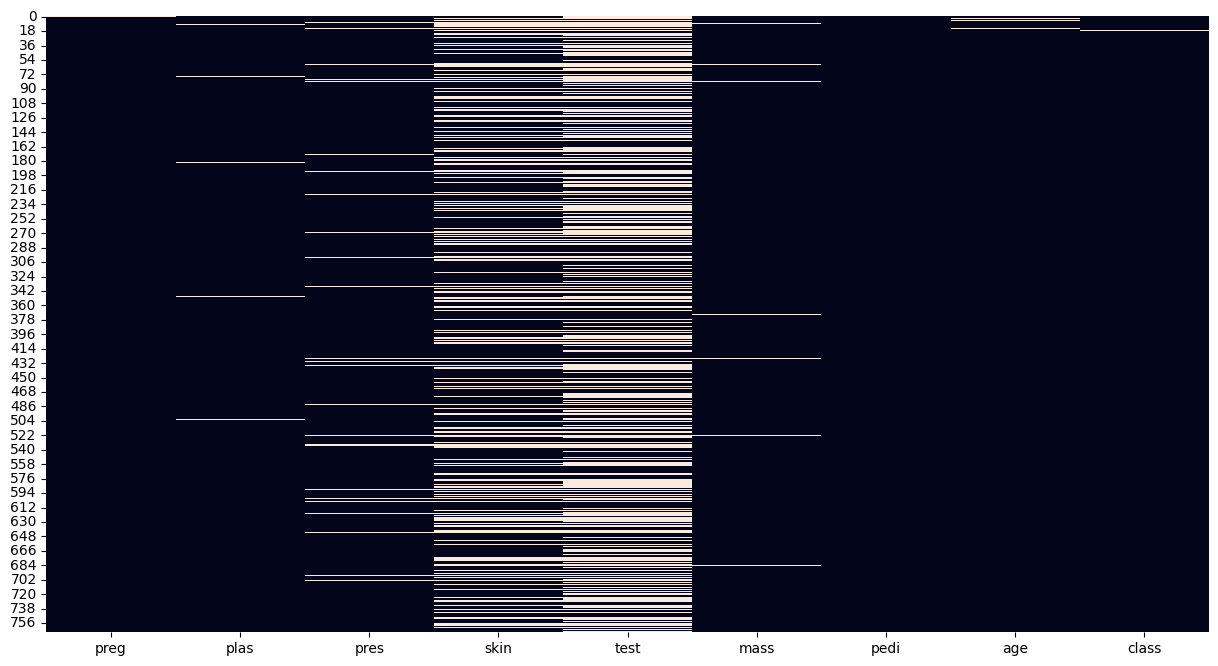

In [344]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize=(15,8))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [345]:
# Imputación con la media de cada columna de las varfiables biométricas
# Columnas de variables biométricas donde 0 se considera faltante y se ha reemplazado previamente con NaN

cols_bio = ['plas', 'pres', 'skin', 'test', 'mass']
for col in cols_bio:
    media = df[col].mean()
    df[col]=df[col].fillna(media) 
    print(f"Imputada la columna '{col}' con la media = {media:.2f}")

# Verificar que ya no haya valores faltantes
print("\nValores faltantes después de la imputación:")
print(df[cols_bio].isna().sum())

Imputada la columna 'plas' con la media = 121.70
Imputada la columna 'pres' con la media = 72.41
Imputada la columna 'skin' con la media = 29.15
Imputada la columna 'test' con la media = 155.55
Imputada la columna 'mass' con la media = 32.46

Valores faltantes después de la imputación:
plas    0
pres    0
skin    0
test    0
mass    0
dtype: int64


In [346]:
# Calcular la moda (valor más frecuente) de cada columna, ignorando NaN
mode_class = df['class'].mode(dropna=True).iloc[0]
mode_preg  = df['preg'].mode(dropna=True).iloc[0]

# Rellenar los NaN con la moda correspondiente
df['class'] = df['class'].fillna(mode_class)
df['preg']  = df['preg'].fillna(mode_preg)

# (Opcional) verificación rápida
print("Moda usada en 'class':", mode_class)
print("Moda usada en 'preg':", mode_preg)
print("NaN restantes en 'class':", df['class'].isna().sum())
print("NaN restantes en 'preg':", df['preg'].isna().sum())


Moda usada en 'class': 0.0
Moda usada en 'preg': 1.0
NaN restantes en 'class': 0
NaN restantes en 'preg': 0


In [347]:
# Calcular la media de 'age' ignorando NaN
mean_age = df['age'].mean()

# Imputar los NaN con la media
df['age'] = df['age'].fillna(mean_age)

# (Opcional) comprobación
print("Media usada en 'age':", mean_age)
print("NaN restantes en 'age':", df['age'].isna().sum())


Media usada en 'age': 33.248366013071895
NaN restantes en 'age': 0


In [348]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    float64
 1   plas    768 non-null    float64
 2   pres    768 non-null    float64
 3   skin    768 non-null    float64
 4   test    768 non-null    float64
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    float64
 8   class   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


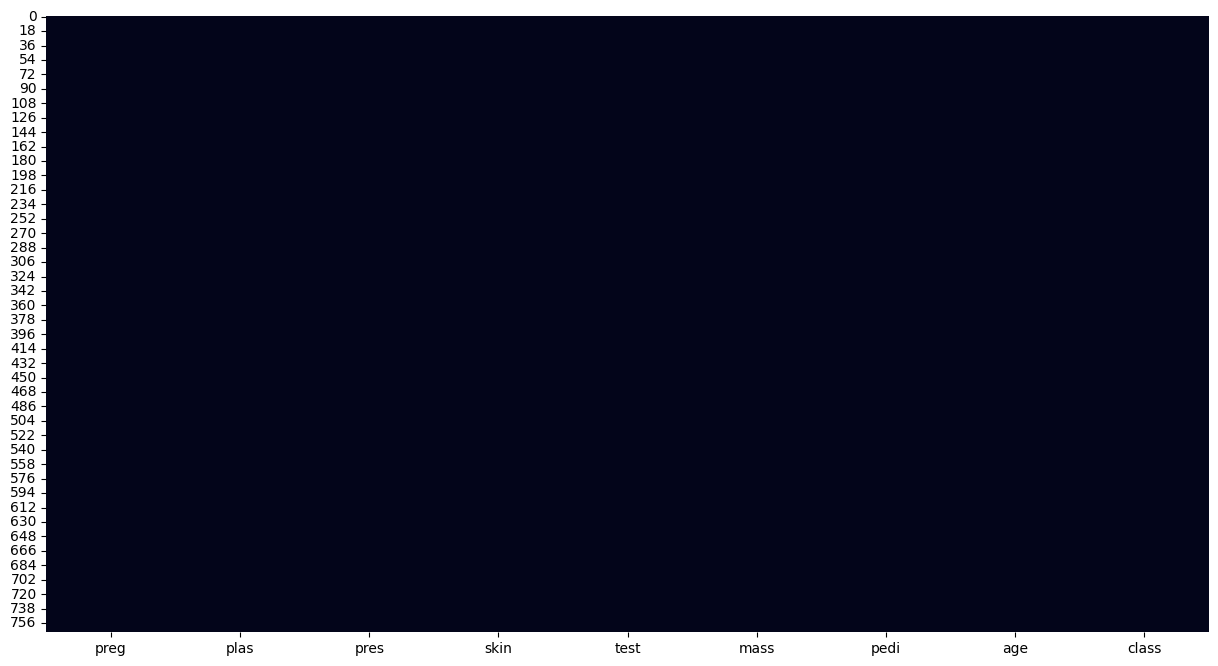

In [349]:
fig, axes = plt.subplots(figsize=(15,8))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [350]:
# Filas duplicadas
print(df.duplicated().sum())


0


La función `nunique()` de pandas se utiliza para contar valores únicos existentes en cada columna (o fila) de un `DataFrame` o `Series`.

| Parámetro  | Descripción                                                                                                | Valor por defecto |
| ---------- | ---------------------------------------------------------------------------------------------------------- | ----------------- |
| axis       | Determina si se cuentan los valores únicos por columnas (`0` o `'index'`) o por filas (`1` o `'columns'`). | `0`               |
| dropna     | Si es `True`, ignora los valores NaN. Si es `False`, los NaN se cuentan como un valor único más.           | `True`            |


```python
DataFrame.nunique(axis=0, dropna=True)


In [351]:
df.nunique()

preg      17
plas     136
pres      47
skin      51
test     186
mass     248
pedi     517
age       53
class      2
dtype: int64

In [352]:
df.nunique().sort_values(ascending=False)

pedi     517
mass     248
test     186
plas     136
age       53
skin      51
pres      47
preg      17
class      2
dtype: int64

<Figure size 1200x800 with 0 Axes>

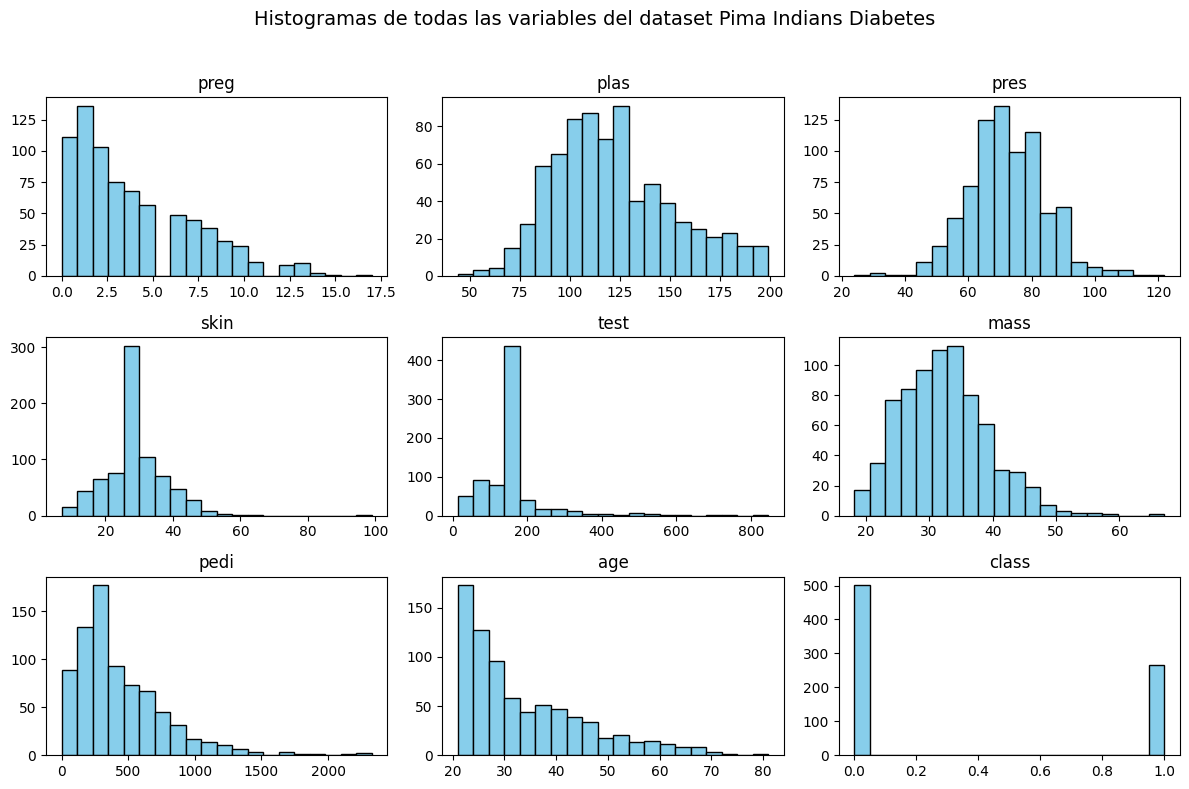

In [353]:
import pandas as pd                     # Importa la librería pandas para manipulación de datos
import matplotlib.pyplot as plt          # Importa matplotlib para realizar gráficos



# Crear histogramas para todas las variables numéricas del dataset
plt.figure(figsize=(12, 8))              # Define el tamaño de la figura (ancho x alto en pulgadas)
df.hist(bins=20,                         # Define el número de barras (bins) del histograma
        color='skyblue',                 # Asigna un color azul claro a las barras
        edgecolor='black',               # Agrega un borde negro a cada barra para mejor visibilidad
        grid=False,                      # Elimina las cuadrículas internas para un diseño más limpio
        figsize=(12, 8))                 # Tamaño del gráfico para todos los histogramas

plt.suptitle('Histogramas de todas las variables del dataset Pima Indians Diabetes', 
             fontsize=14)                # Agrega un título general a todos los subgráficos
plt.tight_layout(rect=[0, 0, 1, 0.96])   # Ajusta el espaciado entre gráficos y deja espacio para el título
plt.show()                               # Muestra todos los histogramas en una cuadrícula

### Outliers (valores atípicos). Definición y ejemplos.


<div align="center">
    <img src="8.png" alt="Outliers" width="700">
</div>

Los **outliers** o **valores atípicos** son observaciones que se alejan significativamente del resto de los datos. Pueden representar:

- Errores de medición o captura.
- Casos especiales o poco comunes.


Los outliers pueden distorsionar el valor de medidas estadísticas como la media, la desviación estándar y afectar los resultados de un modelo predictivo.


1. ¿Qué es un outlier?

Un outlier es un valor que está **muy por encima o por debajo** del rango donde se concentra la mayoría de los datos.

Por ejemplo:

| Edad |  
|------|  
| 22   |  
| 24   |  
| 25   |  
| 26   |  
| 98   |  

Aquí el valor 98 es un **outlier**, ya que no sigue el patrón del resto de datos del atributo Edad (jóvenes de unos 25 años).

2. Cómo detectar outliers

Existen varias formas de detectarlos. Las más comunes son:

a) Método gráfico
Usando **diagramas de caja** (*boxplots*) o **histogramas** para observar valores extremos. (Lo veremos posteriormente)

b) Método estadístico
Usando medidas como el **rango intercuartílico (IQR)**, **z-score**, o **percentiles**.


3. Detección con el método del rango intercuartílico (IQR)

El IQR es la distancia entre el tercer cuartil (Q3) y el primer cuartil (Q1):


IQR = Q3 - Q1

El 50% de los datos de una distribución se concentra entre el primer cuartil y el tercer cuartil.

Típicamente, se considera outlier todo valor menor que Q1 - 1.5IQR o mayor que Q3 + 1.5IQR



In [354]:
# Ejemplo con la variable plas (glucosa).
# Mostramos cuántas observaciones están fuera del rango [Q1 - 1.5IQR, Q3 + 1.5IQR ] de valores de la variable glucosa.

Q1 = df['plas'].quantile(0.25)
Q3 = df['plas'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR #1.5 veces el rango intercuartílico
limite_superior = Q3 + 1.5 * IQR

print("Primer cuartil Q1:", Q1)
print("Tercer cuartil Q3:", Q3)
print("Rango intercuartílico IQR:", IQR)
print("Límite inferior:", limite_inferior)
print("Límite superior:", limite_superior)

# Filtrar los outliers
outliers_plas = df['plas'][(df['plas'] < limite_inferior) | (df['plas'] > limite_superior)] #Serie Pandas con índices y valores de outliers
len(outliers_plas)


Primer cuartil Q1: 99.75
Tercer cuartil Q3: 140.25
Rango intercuartílico IQR: 40.5
Límite inferior: 39.0
Límite superior: 201.0


0

<div align="center">
    <img src="9.png" alt="Instalar matplotlib" width="700">
</div>

In [355]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    float64
 1   plas    768 non-null    float64
 2   pres    768 non-null    float64
 3   skin    768 non-null    float64
 4   test    768 non-null    float64
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    float64
 8   class   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


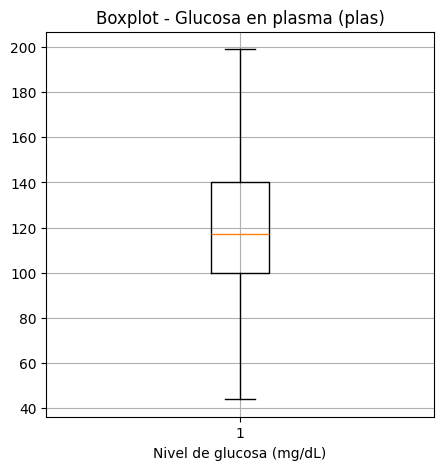

In [356]:
#Importamos el módulo matplotlib.pyplot y le asignamos el alias plt,
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))                                    # Crea una nueva figura contenedora para el gráfico
plt.boxplot(df['plas'])                                        # Crea el boxplot de la variable 'plas' en orientación horizontal (vert=False)
plt.title('Boxplot - Glucosa en plasma (plas)')     # Agrega un título descriptivo al gráfico
plt.xlabel('Nivel de glucosa (mg/dL)')                         # Etiqueta el eje X (porque ahora el gráfico es horizontal)
plt.grid(True)                                                 # Activa la cuadrícula para mejor visualización
plt.show()                                                     # Muestra el gráfico en pantalla


In [357]:
df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.00000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.838542,121.70210,72.405184,29.153420,155.548223,32.457464,428.235091,33.248366,0.347656
std,3.370239,30.43302,12.096346,8.790942,85.021108,6.875151,340.485655,11.759476,0.476537
min,0.000000,44.00000,24.000000,7.000000,14.000000,18.200000,0.100000,21.000000,0.000000
25%,1.000000,99.75000,64.000000,25.000000,121.500000,27.500000,205.000000,24.000000,0.000000
50%,3.000000,117.00000,72.202592,29.153420,155.548223,32.400000,337.000000,29.000000,0.000000
75%,6.000000,140.25000,80.000000,32.000000,155.548223,36.600000,591.500000,41.000000,1.000000
max,17.000000,199.00000,122.000000,99.000000,846.000000,67.100000,2329.000000,81.000000,1.000000


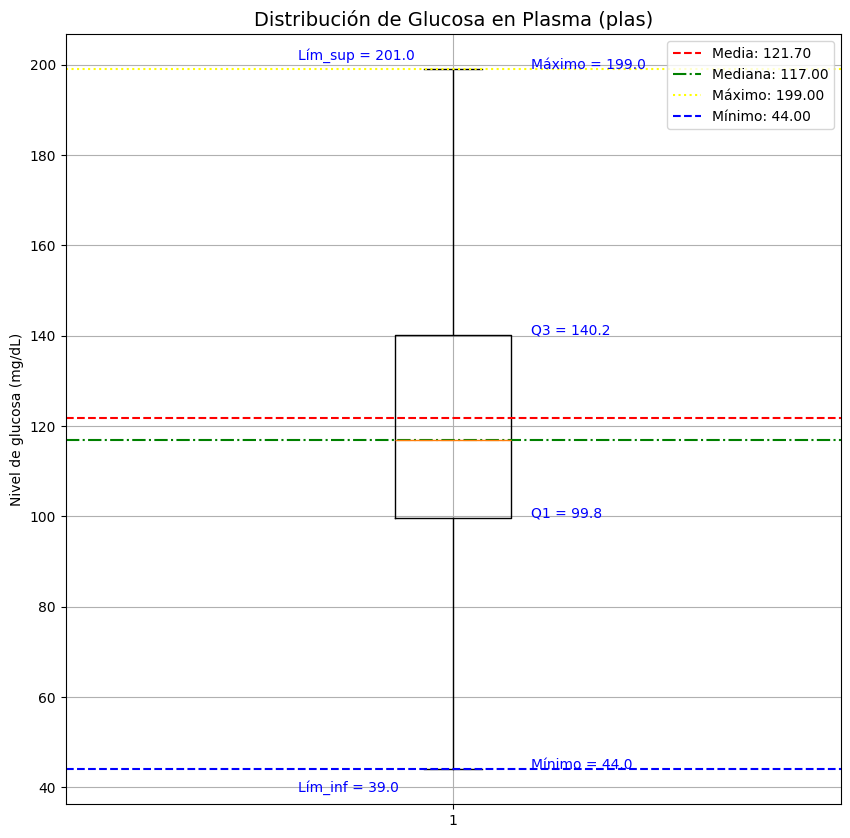

In [358]:
import numpy as np

plt.figure(figsize=(10,10))

# Boxplot
plt.boxplot(df['plas'])

# Título y etiquetas
plt.title('Distribución de Glucosa en Plasma (plas)', fontsize=14)
plt.ylabel('Nivel de glucosa (mg/dL)')

# Cálculo de estadísticas
Q1 = df['plas'].quantile(0.25) #primer cuartil
Q3 = df['plas'].quantile(0.75) #tercer cuartil
median = df['plas'].median() #Calcula la mediana de la distribución de valores
mean = df['plas'].mean() #Calcula el valor medio de la distribución de valores
max = df['plas'].max() # máximo de la distribución de valores
min = df['plas'].min() # mínimo de la distribución de valores
# Líneas de referencia
plt.axhline(mean, color='red', linestyle='--', label=f'Media: {mean:.2f}')
plt.axhline(median, color='green', linestyle='-.', label=f'Mediana: {median:.2f}')
plt.axhline(max, color='yellow', linestyle=':', label=f'Máximo: {max:.2f}')
plt.axhline(min, color='blue', linestyle='--', label=f'Mínimo: {min:.2f}')

# Leyenda cuartiles
plt.text(1.1, Q1, f'Q1 = {Q1:.1f}', color='blue') #Posición leyenda Q1 en (1.1, Q1)
plt.text(1.1, Q3, f'Q3 = {Q3:.1f}', color='blue') #Posición leyenda Q3 en (1.1, Q3)

# Leyenda Máximo y mínimo
plt.text(1.1, max, f'Máximo = {max:.1f}', color='blue') #Posición leyenda max en (1.1, max)
plt.text(1.1, min, f'Mínimo = {min:.1f}', color='blue') #Posición leyenda min en (1.1, max)

#Cálculo límites superior e inferior
IRQ = Q3 - Q1
lim_sup = Q3 + 1.5 * IRQ
lim_inf = Q1 - 1.5 * IRQ
plt.text(0.8, lim_sup, f'Lím_sup = {lim_sup:.1f}', color='blue') #Posición leyenda lim_sup en (0.8, lim_sup)
plt.text(0.8, lim_inf, f'Lím_inf = {lim_inf:.1f}', color='blue') #Posición leyenda lim_inf en (0.8, lim_inf)

# Mostrar leyenda
plt.legend()
plt.grid(True)
plt.show()


Si en el boxplot de la variable plas los bigotes coinciden con el valor máximo y mínimo, significa que:

1. No existen outliers según la regla de 1.5×IQR.
2. Todos los valores de plas se encuentran dentro del rango:  **[Q1−1.5×IQR, Q3+1.5×IQR]**

Por tanto:

1. El bigote inferior llega al mínimo real del conjunto de datos.
2. El bigote superior llega al máximo real.
3. No se muestran puntos fuera de los bigotes (porque no hay valores atípicos).

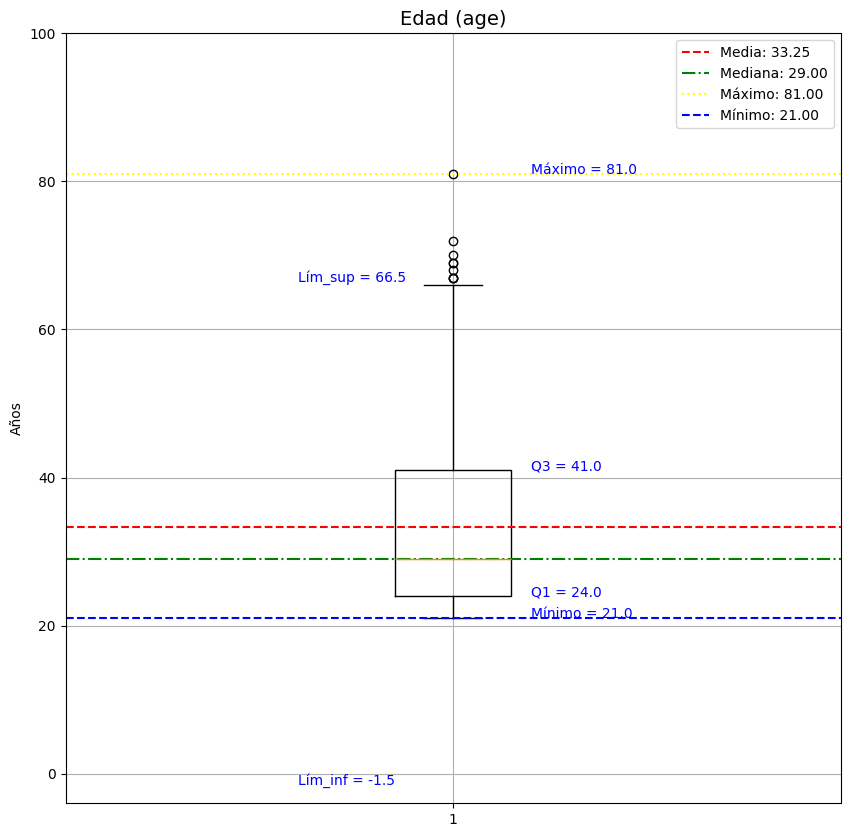

In [359]:
import numpy as np

plt.figure(figsize=(10,10))

# Boxplot
ax = plt.boxplot(df['age'])
ax = plt.gca()         # obtiene el eje actual
ax.set_ylim(-4, 100)   

# Título y etiquetas
plt.title('Edad (age)', fontsize=14)
plt.ylabel('Años')

# Cálculo de estadísticas
Q1 = df['age'].quantile(0.25) #primer cuartil
Q3 = df['age'].quantile(0.75) #tercer cuartil
median = df['age'].median() #Calcula la mediana de la distribución de valores
mean = df['age'].mean() #Calcula el valor medio de la distribución de valores
max = df['age'].max() # máximo de la distribución de valores
min = df['age'].min() # mínimo de la distribución de valores
# Líneas de referencia
plt.axhline(mean, color='red', linestyle='--', label=f'Media: {mean:.2f}')
plt.axhline(median, color='green', linestyle='-.', label=f'Mediana: {median:.2f}')
plt.axhline(max, color='yellow', linestyle=':', label=f'Máximo: {max:.2f}')
plt.axhline(min, color='blue', linestyle='--', label=f'Mínimo: {min:.2f}')

# Leyenda cuartiles
plt.text(1.1, Q1, f'Q1 = {Q1:.1f}', color='blue') #Posición leyenda Q1 en (1.1, Q1)
plt.text(1.1, Q3, f'Q3 = {Q3:.1f}', color='blue') #Posición leyenda Q3 en (1.1, Q3)

# Leyenda Máximo y mínimo
plt.text(1.1, max, f'Máximo = {max:.1f}', color='blue') #Posición leyenda max en (1.1, max)
plt.text(1.1, min, f'Mínimo = {min:.1f}', color='blue') #Posición leyenda min en (1.1, max)

#Cálculo límites superior e inferior
IRQ = Q3 - Q1
lim_sup = Q3 + 1.5 * IRQ
lim_inf = Q1 - 1.5 * IRQ
plt.text(0.8, lim_sup, f'Lím_sup = {lim_sup:.1f}', color='blue') #Posición leyenda lim_sup en (0.8, lim_sup)
plt.text(0.8, lim_inf, f'Lím_inf = {lim_inf:.1f}', color='blue') #Posición leyenda lim_inf en (0.8, lim_inf)

# Mostrar leyenda
plt.legend()
plt.grid(True)
plt.show()


In [360]:
columnas = df.columns.tolist()
columnas

['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

In [361]:
for col in columnas:
    Q1 = df[col].quantile(0.25) #Primer cuantil. El 25% de los valores de la distribución de valores de cada columna está por debajo de Q1
    Q3 = df[col].quantile(0.75) #Tercer cuantil. El 25% de los valores de la distribución de valores de cada columna está por encima de Q3
    IQR = Q3 - Q1               #rango intercuartílico
    lim_Inferior = Q1 - 1.5 * IQR
    lim_Superior = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lim_Inferior) | (df[col] > lim_Superior)]
    num_Out = len(outliers)
    print(f'{col:<5}: {num_Out} valores atípicos (outliers) que representan el {num_Out/len(col):.1f} % del total de {len(df[col])}')
    print(f'{col:<5}: maximo: {df[col].max():>5.2f}  minimo: {df[col].min():>5.2f}   Lim sup: {lim_Superior:>5.2f}   lim inf: {lim_Inferior:>5.2f}\n')

preg : 4 valores atípicos (outliers) que representan el 1.0 % del total de 768
preg : maximo: 17.00  minimo:  0.00   Lim sup: 13.50   lim inf: -6.50

plas : 0 valores atípicos (outliers) que representan el 0.0 % del total de 768
plas : maximo: 199.00  minimo: 44.00   Lim sup: 201.00   lim inf: 39.00

pres : 14 valores atípicos (outliers) que representan el 3.5 % del total de 768
pres : maximo: 122.00  minimo: 24.00   Lim sup: 104.00   lim inf: 40.00

skin : 87 valores atípicos (outliers) que representan el 21.8 % del total de 768
skin : maximo: 99.00  minimo:  7.00   Lim sup: 42.50   lim inf: 14.50

test : 164 valores atípicos (outliers) que representan el 41.0 % del total de 768
test : maximo: 846.00  minimo: 14.00   Lim sup: 206.62   lim inf: 70.43

mass : 8 valores atípicos (outliers) que representan el 2.0 % del total de 768
mass : maximo: 67.10  minimo: 18.20   Lim sup: 50.25   lim inf: 13.85

pedi : 29 valores atípicos (outliers) que representan el 7.2 % del total de 768
pedi : m

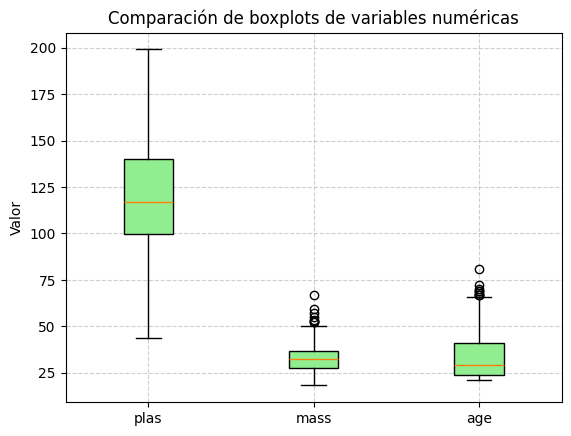

In [362]:
plt.boxplot([df['plas'], df['mass'], df['age']],                # Crea un boxplot para tres columnas del DataFrame: 'plas', 'mass' y 'age'
            tick_labels=['plas', 'mass', 'age'],                # Asigna etiquetas a cada boxplot en el eje X
            patch_artist=True,                                  # Permite rellenar las cajas con color
            boxprops=dict(facecolor='lightgreen'))              # Define el color de las cajas (verde claro)
plt.title('Comparación de boxplots de variables numéricas')     # Añade un título descriptivo al gráfico
plt.ylabel('Valor')                                             # Etiqueta el eje Y con el nombre 'Valor'
plt.grid(True, linestyle='--', alpha=0.6)                       # Activa una cuadrícula con líneas discontinuas y transparencia
plt.show()                                                      # Muestra el gráfico en pantalla

#Los bigotes llegan hasta el último dato dentro de Q1 − 1.5·IQR y Q3 + 1.5·IQR. Los puntos más allá se dibujan como outliers.
#Por eso, el min y max solo coinciden con los bigotes si caen dentro de ese rango.

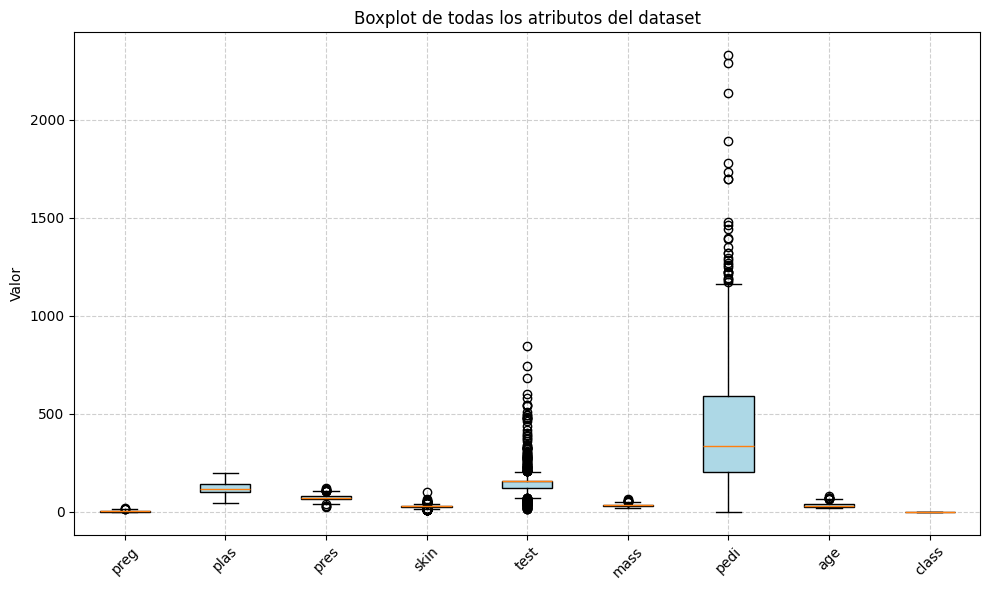

In [363]:
plt.figure(figsize=(10, 6))  # Define el tamaño del gráfico (ancho x alto en pulgadas)

plt.boxplot(df.values,                                         # Crea boxplots para todas las columnas del DataFrame
            tick_labels=df.columns,                            # Usa los nombres de las columnas como etiquetas en el eje X
            patch_artist=True,                                 # Permite rellenar las cajas con color
            boxprops=dict(facecolor='lightblue'))               # Asigna un color azul claro a las cajas

plt.title('Boxplot de todas los atributos del dataset')        # Título descriptivo del gráfico
plt.ylabel('Valor')                                            # Etiqueta para el eje Y
plt.xticks(rotation=45)                                        # Rota las etiquetas del eje X para que no se sobrepongan
plt.grid(True, linestyle='--', alpha=0.6)                      # Agrega una cuadrícula con líneas discontinuas y transparencia
plt.tight_layout()                                             # Ajusta el diseño para evitar que las etiquetas se corten
plt.show()                                                     # Muestra el gráfico en pantalla


### tratamiento de outliers
| Estrategia                               | Qué se hace                                                                                            | Cuándo aplicarla                                                  |
| ---------------------------------------- | ------------------------------------------------------------------------------------------------------ | ----------------------------------------------------------------- |
| **1. Verificar errores de registro de datos**        | Revisar si el valor es físicamente imposible (ej. glucosa = 0) y reemplazarlo por `NaN` o eliminarlo.  | Si es un error evidente.                                          |
| **2. Reemplazar con valores plausibles** | Usar la **media, mediana o moda** del atributo, o técnicas como **KNNImputer**.                        | Si el valor se sospecha erróneo pero la fila es importante.       |
| **3. Recorte (*trimming*)**              | Eliminar filas que estén por fuera de un rango definido (ej. fuera de ±3σ o 1.5×IQR).                  | Si hay suficientes datos y los extremos distorsionan el análisis. |
| **4. Winsorización**                     | Reemplazar los outliers por los límites superior e inferior permitidos.                                | Si no se quiere perder información, pero sí limitar su impacto.   |
| **5. Transformaciones**                  | Aplicar transformaciones (log, raíz cuadrada, Box-Cox) para reducir el efecto de los valores extremos. | Si los datos son muy asimétricos.                                 |
| **6. Modelos robustos**                  | Usar algoritmos menos sensibles a outliers (como *tree-based models* o *robust scaling*).              | En etapas de modelado.                                            |


La mediana es robusta porque (el valor central de la distribución ordenada) no se ve afectada por outliers. Solo depende del orden, no de los valores extremos.

Por ejemplo:

| Datos                      |  Media | Mediana |
| :------------------------- | :----: | :-----: |
| [0.4, 0.6, 0.8, 1.0, 1.2]  |   0.8  |   0.8   |
| [0.4, 0.6, 0.8, 1.0, 1000] | 200.56 |   0.8   |



En la primera lista (sin valores extremos), media y mediana coinciden.

En la segunda, un valor atípico (1000) dispara la media, pero la mediana se mantiene estable. Por esto la mediana es más robusta frente a outliers.

In [364]:
# Imputación de valores atípicos en 'pedi' y 'test' 

# Calcular la mediana solo con los valores válidos (≤ 1400) en 'pedi'
mediana_pedi = df.loc[df['pedi'] <= 1400, 'pedi'].median()

# Imputar la mediana a los valores atípicos (>1400)
df.loc[df['pedi'] > 1400, 'pedi'] = mediana_pedi

# Calcular la mediana solo con los valores válidos (≤ 600) en 'test'
mediana_test = df.loc[df['test'] <= 600, 'test'].median()

# Imputar la mediana a los valores atípicos (>600)
df.loc[df['test'] > 600, 'test'] = mediana_test

# Confirmar los cambios
num_outliers_pedi = (df['pedi'] > 1400).sum()
num_outliers_test = (df['test'] > 600).sum()

print(f"Se imputó la mediana ({mediana_pedi:.3f}) a los valores de 'pedi' mayores de 1400.")
print(f"Se imputó la mediana ({mediana_test:.3f}) a los valores de 'test' mayores de 600.\n")

print(f"Nuevo rango de 'pedi': min={df['pedi'].min():.3f}, max={df['pedi'].max():.3f}")
print(f"Nuevo rango de 'test': min={df['test'].min():.3f}, max={df['test'].max():.3f}")


Se imputó la mediana (334.000) a los valores de 'pedi' mayores de 1400.
Se imputó la mediana (155.548) a los valores de 'test' mayores de 600.

Nuevo rango de 'pedi': min=0.100, max=1394.000
Nuevo rango de 'test': min=14.000, max=600.000


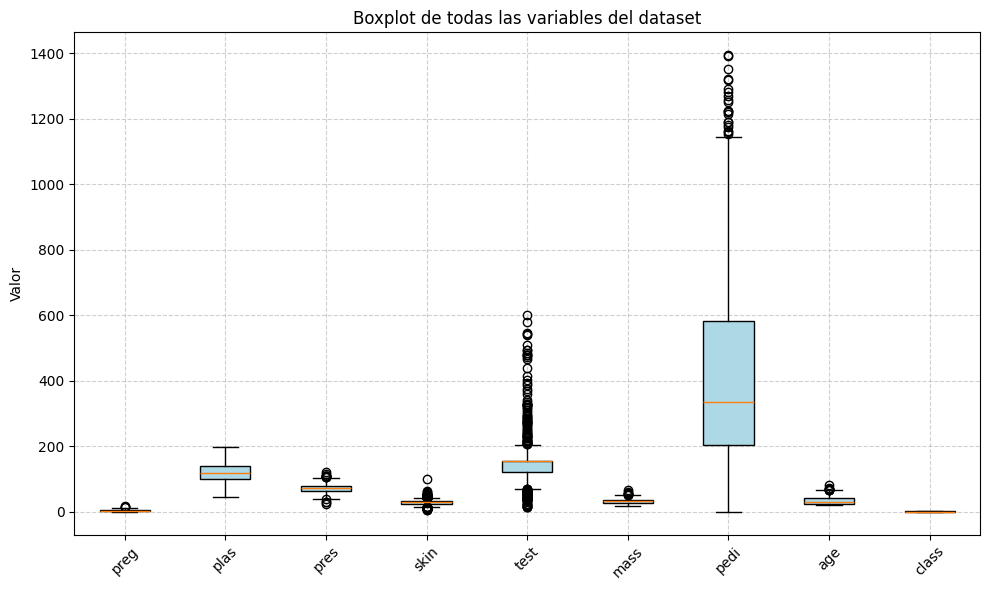

In [365]:
plt.figure(figsize=(10, 6))  # Define el tamaño del gráfico (ancho x alto en pulgadas)

plt.boxplot(df.values,                                         # Crea boxplots para todas las columnas del DataFrame
            tick_labels=df.columns,                            # Usa los nombres de las columnas como etiquetas en el eje X
            patch_artist=True,                                 # Permite rellenar las cajas con color
            boxprops=dict(facecolor='lightblue'))               # Asigna un color azul claro a las cajas

plt.title('Boxplot de todas las variables del dataset')  # Título descriptivo del gráfico
plt.ylabel('Valor')                                            # Etiqueta para el eje Y
plt.xticks(rotation=45)                                        # Rota las etiquetas del eje X para que no se sobrepongan
plt.grid(True, linestyle='--', alpha=0.6)                      # Agrega una cuadrícula con líneas discontinuas y transparencia
plt.tight_layout()                                             # Ajusta el diseño para evitar que las etiquetas se corten
plt.show()                                                     # Muestra el gráfico en pantalla

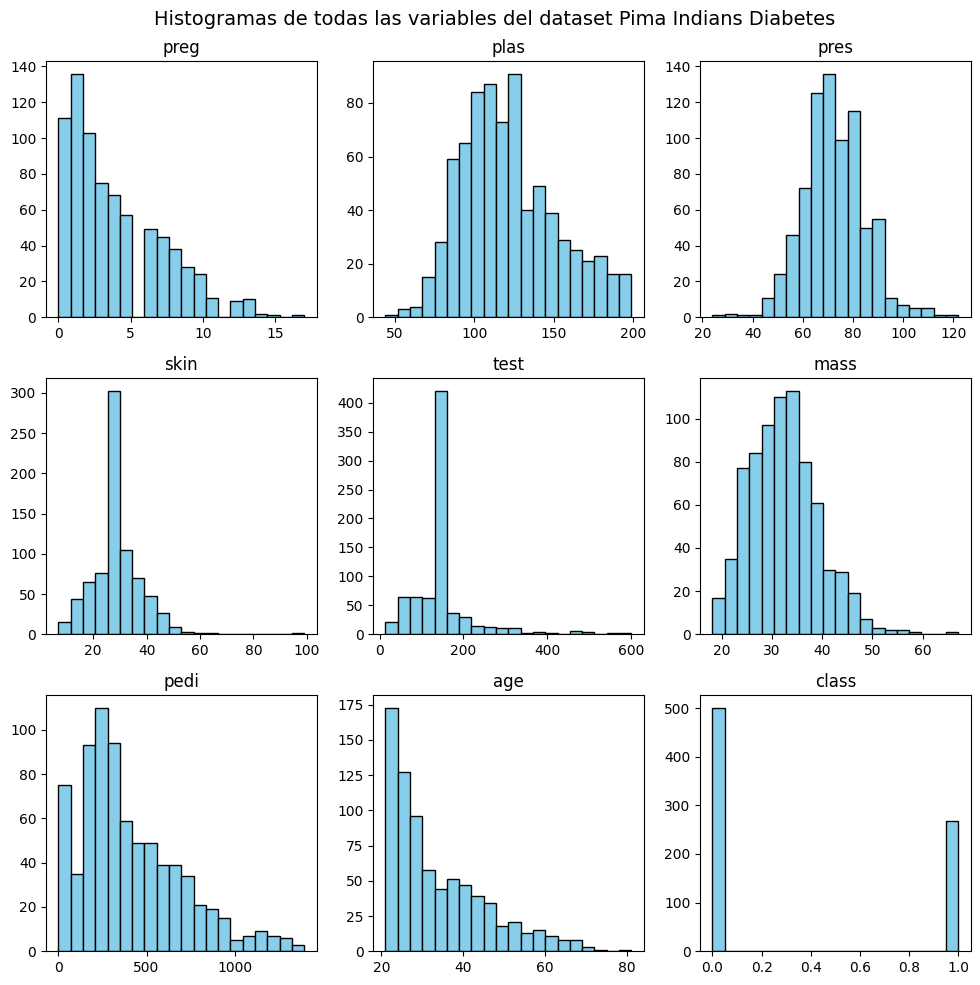

In [366]:
# Crear histogramas para todas las variables del dataset
df.hist(bins=20,                         # Define el número de barras (bins) del histograma
        color='skyblue',                 # Asigna un color azul claro a las barras
        edgecolor='black',               # Agrega un borde negro a cada barra para mejor visibilidad
        grid=False,                      # Elimina las cuadrículas internas para un diseño más limpio
        figsize=(10, 10))                 # Tamaño del gráfico para todos los histogramas

plt.suptitle('Histogramas de todas las variables del dataset Pima Indians Diabetes', 
             fontsize=14)                # Agrega un título general a todos los subgráficos
plt.tight_layout()                       # Ajusta el espaciado entre gráficos y deja espacio para el título
plt.show()                               # Muestra todos los histogramas


#### Asimetría (*Skewness*) en un DataFrame  


La **asimetría** (en inglés *skewness*) es una medida estadística que indica cuánto se desvía la distribución de una variable respecto a una forma simétrica (como la curva normal). Es decir:


- Si los datos están distribuidos simétricamente a ambos lados de la media → *skewness* ≈ 0
- Si los datos tienen una cola más larga a la derecha, *skewness* > 0 (asimetría positiva)
- Si los datos tienen una cola más larga a la izquierda, *skewness* < 0 (asimetría negativa)


1. Interpretación numérica de *skewness* en términos de la media, la mediana y la moda



| Tipo de asimetría       | Relación entre media, mediana y moda | Aspecto de la distribución de la gráfica del atributo              |
|-------------------------|--------------------------------------|--------------------------------------------------------------------|
| **Simétrica**           | Media ≈ Mediana ≈ Moda               | La distribución es equilibrada (como una campana normal).          |
| **Positiva (skew > 0)** | Moda < Mediana < Media               | Cola hacia la derecha. Hay pocos valores altos y muchos pequeños.  |
| **Negativa (skew < 0)** | Media < Mediana < Moda               | Cola hacia la izquierda. Hay pocos valores bajos y muchos grandes. |


2. Cálculo de la asimetría en pandas

En pandas, se calcula con el método `.skew()`


3. Aplicación al dataset *Pima Indians Diabetes*

| Variable |       Skew | Tipo de asimetría                | Relación media–mediana–moda (esperada) | Interpretación (moda/mediana)                                                                                                                                        |
| -------- | ---------: | -------------------------------- | -------------------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `preg`   | **+0.906** | Positiva                         | **Moda < Mediana < Media**             | La mayoría tiene pocos embarazos; algunas mujeres con valores altos alargan la cola derecha y elevan la media.                                                       |
| `plas`   | **+0.540** | Positiva leve                    | **Moda < Mediana < Media**             | Glucosa moderadamente sesgada a la derecha: valores altos menos frecuentes elevan la media (mediana = 117 < media ≈ 121.6).                                          |
| `pres`   | **+0.164** | Casi simétrica (ligera positiva) | **Media ≈ Mediana ≈ Moda**             | Presión diastólica muy equilibrada (mediana 72 ≈ media 72.3); el sesgo es pequeño.                                                                                   |
| `skin`   | **+0.520** | Positiva leve                    | **Moda < Mediana < Media** *(teórico)* | Sesgo derecho leve, aunque aquí **mediana (32) ≳ media (30.0)** por discreción/acumulación en 32 y valores bajos; la cola derecha existe pero la mediana queda alta. |
| `test`   | **+3.424** | Positiva fuerte                  | **Moda < Mediana < Media**             | Insulina con larga cola a la derecha: pocos valores muy altos (hasta 846) elevan claramente la media (130.9) sobre la mediana (105).                                      |
| `mass`   | **+0.601** | Positiva leve                    | **Moda < Mediana < Media**             | IMC algo sesgado a la derecha: más casos en torno a 30–36, con algunos altos que suben la media (32.45) sobre la mediana (32).                                       |
| `pedi`   | **+1.562** | Positiva marcada                 | **Moda < Mediana < Media**             | Función de pedigrí muy dispersa con cola derecha: pocos valores muy altos (máx 2329) empujan la media por encima de la mediana.                                      |
| `age`    | **+1.128** | Positiva                         | **Moda < Mediana < Media**             | Predominan edades bajas/medias; algunos valores altos alargan la cola y elevan la media (33.25) frente a la mediana (29).                                            |
| `class`  | **+0.641** | Positiva (binaria)               | **Moda (=0) ≤ Mediana (=0) < Media**   | Variable binaria desbalanceada hacia 0: la media (~0.348) refleja ~35% de positivos; mediana y moda son 0.                                                           |


In [367]:
## Calcular la asimetría (skewness) de todas las variables del dataframe
skew_values = df.skew()
skew_values

preg     0.905826
plas     0.531431
pres     0.137305
skin     0.822173
test     2.294340
mass     0.598253
pedi     0.913948
age      1.127931
class    0.641048
dtype: float64

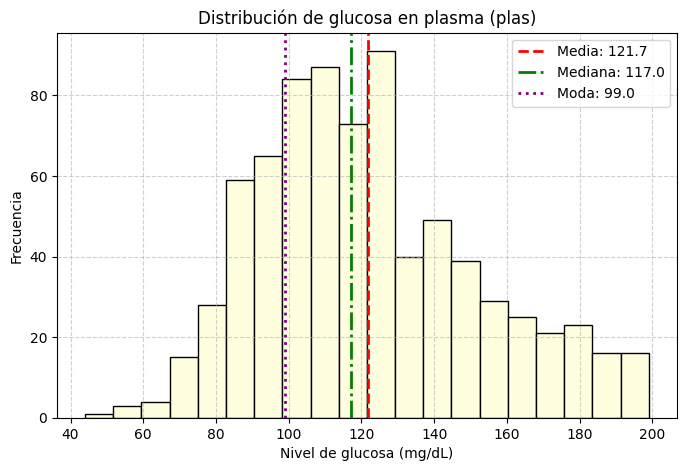

In [368]:

# Seleccionar la variable 'plas' (glucosa en plasma)
x = df['plas']

# Calcular medidas estadísticas básicas
media = x.mean()             # Media: valor promedio
mediana = x.median()         # Mediana: valor central
moda = x.mode()[0]           # Moda: valor más frecuente
asimetria = x.skew()         # Asimetría (skewness): mide la simetría de la distribución

# Crear el histograma
plt.figure(figsize=(8,5))    # Define el tamaño del gráfico
plt.hist(x, bins=20, color='lightyellow', edgecolor='black')  # Histograma con color 

# Añadir líneas verticales con las medidas estadísticas
plt.axvline(media, color='red', linestyle='--', linewidth=2, 
            label=f'Media: {media:.1f}')
plt.axvline(mediana, color='green', linestyle='-.', linewidth=2, 
            label=f'Mediana: {mediana:.1f}')
plt.axvline(moda, color='purple', linestyle=':', linewidth=2, 
            label=f'Moda: {moda:.1f}')

# Personalización del gráfico
plt.title('Distribución de glucosa en plasma (plas)')
plt.xlabel('Nivel de glucosa (mg/dL)')
plt.ylabel('Frecuencia')
plt.legend()                                         # Muestra las líneas con etiquetas
plt.grid(True, linestyle='--', alpha=0.6)            # Cuadrícula para facilitar la lectura

plt.show()                                           # Muestra el gráfico final


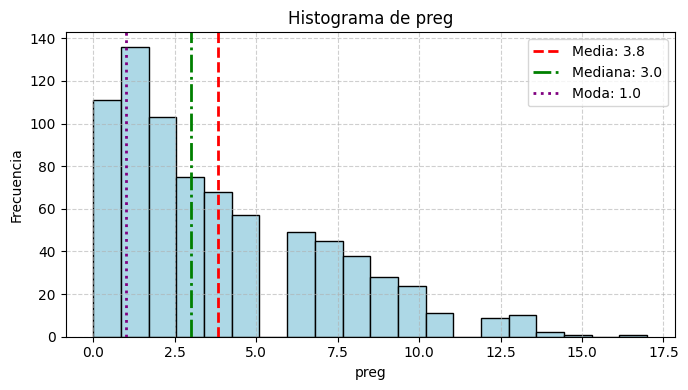

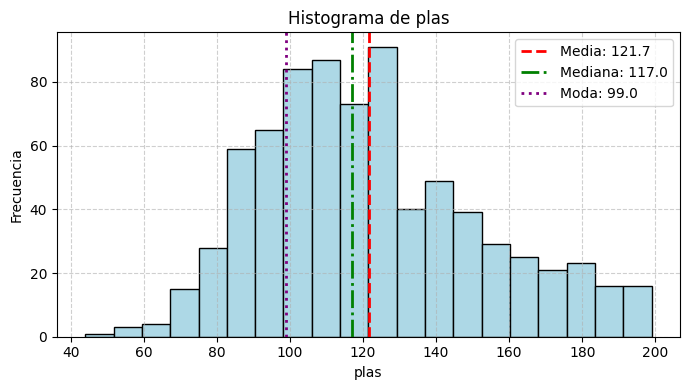

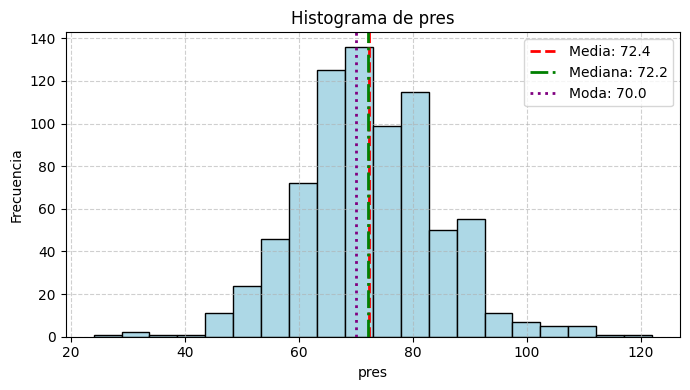

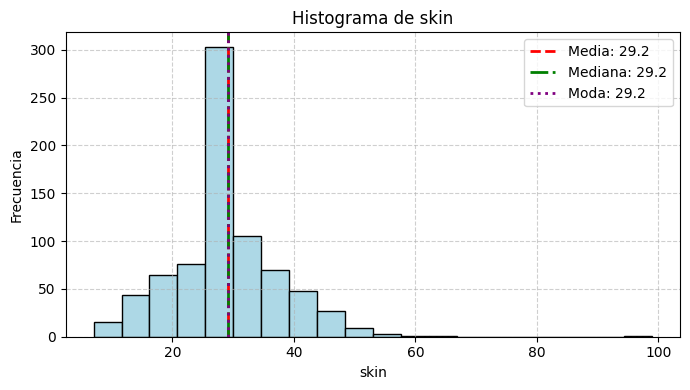

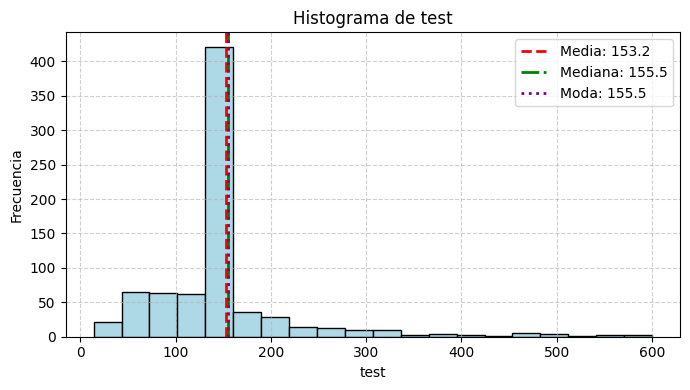

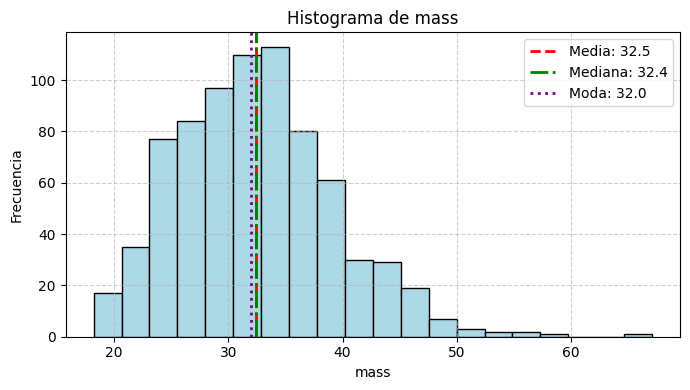

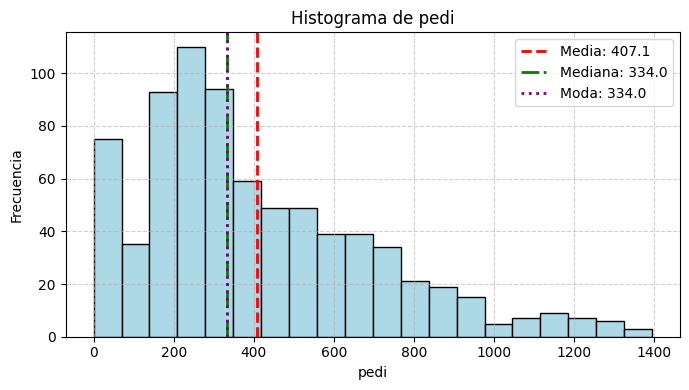

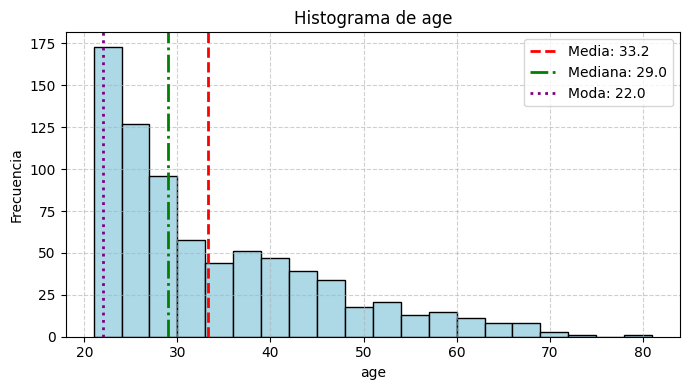

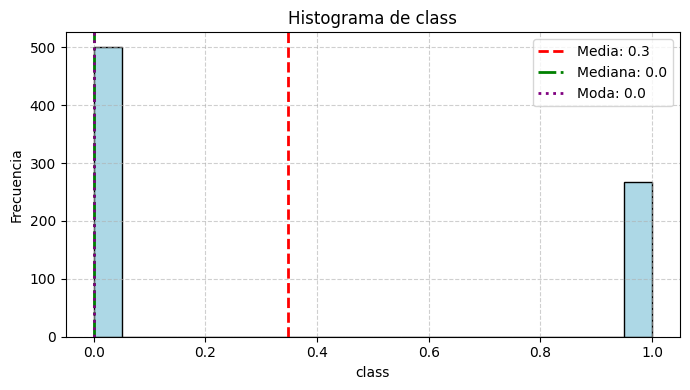

In [369]:
# HISTOGRAMAS DE TODAS LAS VARIABLES (atributos) DEL DATAFRAME


#Generar un histograma por cada columna del DataFrame
for col in df.columns:
    x = df[col]                              # Extrae la columna actual
    media = x.mean()                         # Calcula la media
    mediana = x.median()                     # Calcula la mediana
    moda = x.mode()[0]                       # Calcula la moda (el valor más frecuente). [0] Dame solo la primera moda de la lista de modas posibles.

    # 3. Crear el histograma
    plt.figure(figsize=(7,4))                # Define el tamaño del gráfico
    plt.hist(x, bins=20, color='lightblue',  # Histograma con 20 barras
             edgecolor='black')              # Borde negro para definir bien las barras

    # 4. Añadir líneas con medidas de tendencia central
    plt.axvline(media, color='red', linestyle='--', linewidth=2, 
                label=f'Media: {media:.1f}')     # Línea roja punteada → Media
    plt.axvline(mediana, color='green', linestyle='-.', linewidth=2, 
                label=f'Mediana: {mediana:.1f}') # Línea verde → Mediana
    plt.axvline(moda, color='purple', linestyle=':', linewidth=2, 
                label=f'Moda: {moda:.1f}')       # Línea morada → Moda

    # 5. Personalizar el gráfico
    plt.title(f'Histograma de {col}')        # Título con el nombre de la variable
    plt.xlabel(col)                          # Etiqueta del eje X
    plt.ylabel('Frecuencia')                 # Etiqueta del eje Y
    plt.legend()                             # Muestra las líneas con sus etiquetas
    plt.grid(True, linestyle='--', alpha=0.6) # Activa cuadrícula ligera
    plt.tight_layout()                       # Ajusta el diseño automáticamente
    plt.show()                               # Muestra el gráfico final


# Correlación entre variables  

1. ¿Qué es la correlación?

La correlación es una medida estadística que indica el grado de relación entre dos variables numéricas.  
Nos dice si los valores de una variable aumentan, disminuyen o permanecen independientes respecto a otra.

Por ejemplo:
- ¿Aumenta la glucosa cuando aumenta la edad?  
- ¿Las personas con mayor IMC tienen más probabilidad de ser diabéticas?


2. Tipos de correlación

| Tipo | Descripción | Ejemplo visual |
|:------:|:-------------|:----------------|
| <span style="color:green; font-weight:bold">Positiva (+)</span> | Cuando una variable aumenta, la otra también tiende a aumentar. | <span style="color:green">Edad ↑ → Glucosa ↑</span> |
| <span style="color:red; font-weight:bold">Negativa (–)</span> | Cuando una variable aumenta, la otra tiende a disminuir. | <span style="color:red">Ejercicio ↑ → Peso ↓</span> |
| <span style="color:gray; font-weight:bold">Nula (0)</span> | No existe relación lineal entre las variables. | <span style="color:gray">Presión arterial ↔ Predisposición genética</span> |


3. Coeficiente de correlación de Pearson

El coeficiente de correlación lineal de Pearson (r) mide la fuerza y dirección de una relación lineal entre dos variables numéricas.

Su fórmula es:

    r = Cov(X, Y) / (σ_X * σ_Y)

donde:

Cov(X, Y) → covarianza entre las variables X e Y  
σ_X** y σ_Y → desviaciones estándar de X y Y  

El valor de `r` siempre está entre -1 y +1.


4. Interpretación del coeficiente de correlación (r)

| Valor de `r` | Interpretación | Fuerza de la relación |
|---------------|----------------|------------------------|
| **r = 1** | Correlación perfectamente positiva | Muy fuerte |
| **r ≈ 0.7** | Correlación positiva alta | Fuerte |
| **r ≈ 0.5** | Correlación positiva moderada | Media |
| **r ≈ 0.3** | Correlación positiva débil | Débil |
| **r = 0** | Sin correlación lineal | Nula |
| **r ≈ -0.3** | Correlación negativa débil | Débil |
| **r ≈ -0.7** | Correlación negativa fuerte | Fuerte |
| **r = -1** | Correlación perfectamente negativa | Muy fuerte |



In [370]:
# Configuración para mostrar todas las columnas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Calcular la matriz de correlación
corr_matrix = df.corr()
print(corr_matrix)

           preg      plas      pres      skin      test      mass      pedi       age     class
preg   1.000000  0.126249  0.208546  0.081686  0.082295  0.021239 -0.009786  0.541938  0.216839
plas   0.126249  1.000000  0.219199  0.193010  0.405561  0.231339  0.098880  0.266549  0.494359
pres   0.208546  0.219199  1.000000  0.192816  0.082083  0.281268  0.024920  0.324567  0.165858
skin   0.081686  0.193010  0.192816  1.000000  0.169730  0.542398  0.036265  0.127881  0.215487
test   0.082295  0.405561  0.082083  0.169730  1.000000  0.158014  0.049287  0.136624  0.237467
mass   0.021239  0.231339  0.281268  0.542398  0.158014  1.000000  0.097631  0.024928  0.313333
pedi  -0.009786  0.098880  0.024920  0.036265  0.049287  0.097631  1.000000  0.020092  0.209004
age    0.541938  0.266549  0.324567  0.127881  0.136624  0.024928  0.020092  1.000000  0.239216
class  0.216839  0.494359  0.165858  0.215487  0.237467  0.313333  0.209004  0.239216  1.000000


| Variables relacionadas                     | Valor correlación (r) | Tipo de correlación | Interpretación                                                                                          |
| ------------------------------------------ | --------------------: | ------------------- | ------------------------------------------------------------------------------------------------------- |
| **Edad (age) – Embarazos (preg)**          |            **+0.542** | Positiva fuerte     | Las mujeres de mayor edad suelen tener más embarazos.                                            |
| **IMC (mass) – Pliegue cutáneo (skin)**    |            **+0.542** | Positiva fuerte     | Un mayor pliegue cutáneo está asociado con un mayor índice de masa corporal (IMC).                      |
| **Glucosa (plas) – Clase (class)**         |            **+0.494** | Positiva moderada   | A mayor nivel de glucosa en plasma, mayor probabilidad de diagnóstico de diabetes.                      |
| **Glucosa (plas) – Insulina (test)**       |            **+0.406** | Positiva moderada   | A mayores niveles de glucosa, tienden a encontrarse niveles más altos de insulina.                      |
| **Edad (age) – Presión (pres)**            |            **+0.325** | Positiva débil      | Las personas mayores tienden a tener una presión diastólica algo más elevada.                           |
| **Clase (class) – IMC (mass)**             |            **+0.313** | Positiva débil      | El índice de masa corporal se relaciona levemente con la presencia de diabetes.                         |
| **Edad (age) – Clase (class)**             |            **+0.239** | Positiva débil      | Las personas de mayor edad presentan una probabilidad ligera de padecer diabetes.                 |
| **Insulina (test) – Clase (class)**        |            **+0.237** | Positiva débil      | A mayores niveles de insulina, aumenta ligeramente la probabilidad de diabetes.                         |
| **Presión (pres) – Glucosa (plas)**        |            **+0.219** | Positiva débil      | Las personas con mayor glucosa tienden a tener una presión algo más alta.                               |
| **Embarazos (preg) – Clase (class)**       |            **+0.217** | Positiva débil      | A mayor número de embarazos, la probabilidad de diabetes es ligeramente mayor.                          |
| **Pliegue cutáneo (skin) – Clase (class)** |            **+0.215** | Positiva débil      | Un pliegue cutáneo más grueso se asocia levemente con el diagnóstico de diabetes.                       |
| **Función pedigrí (pedi) – Clase (class)** |            **+0.209** | Positiva débil      | Un mayor valor en la función de pedigrí se asocia con una ligera predisposición genética a la diabetes. |


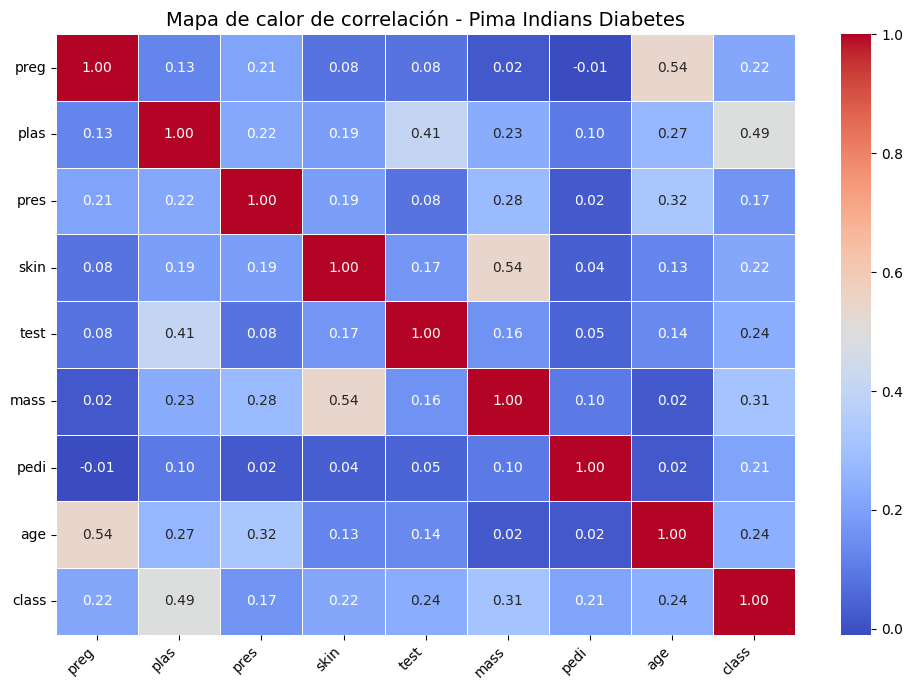

In [371]:
import seaborn as sns #importamos la librería seaborn para generar el mapa de calor
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))                        # Ajusta el tamaño del gráfico
sns.heatmap(corr_matrix,                          # Le pasamos la matriz de correlación
            annot=True,                           # Muestra los valores numéricos
            cmap='coolwarm',                      # Paleta de colores
            fmt=".2f",                            # Dos decimales
            linewidths=0.5,                       # Líneas divisorias entre celdas
            cbar=True)                            # Muestra la barra de color

plt.title('Mapa de calor de correlación - Pima Indians Diabetes', fontsize=14)
plt.xticks(rotation=45, ha='right')                # Rota etiquetas del eje X
plt.yticks(rotation=0)                             # Mantiene etiquetas del eje Y horizontales
plt.tight_layout()
plt.show()


### Mapa de calor (Heatmap) de correlaciones


Un **mapa de calor** (o *heatmap*) es una representación visual de una matriz de valores numéricos, donde los números se sustituyen por colores que indican su magnitud.

En este caso, el mapa de calor se utiliza para visualizar la matriz de correlaciones entre las variables numéricas del dataset *Pima Indians Diabetes*.


#### ¿Qué representa el color?

Cada celda del mapa muestra el **grado de relación** (correlación) entre dos variables:

- <span style="color:red; font-weight:bold">Rojo intenso</span> → correlación **positiva fuerte**  
  (cuando una variable aumenta, la otra también aumenta).  
  <br>Ejemplo: **Glucosa (`plas`)** y **Clase (`class`)**, con *r ≈ +0.49*.

- <span style="color:blue; font-weight:bold">Azul intenso</span> → correlación **negativa fuerte**  
  (cuando una variable aumenta, la otra disminuye).  
  <br>Ejemplo: **Insulina (`test`)** y **Edad (`age`)**, con *r ≈ –0.14* (aunque débil, ilustra la dirección inversa de la relación entre estos atributos).

- <span style="color:gray; font-weight:bold">Colores claros o neutros</span> → correlación **nula o muy débil**  
  (las variables no tienen relación lineal aparente).



#### ¿Para qué sirve el mapa de calor?

El heatmap nos permite detectar rápidamente patrones y relaciones entre variables sin leer cada número de la matriz de correlación.  
Es una herramienta clave en el Análisis Exploratorio de Datos (EDA) porque:

1. **Facilita la interpretación visual**: los colores ayudan a identificar relaciones fuertes o débiles de un vistazo.  
2. **Permite descubrir relaciones inesperadas** entre variables que podrían influir en el resultado (por ejemplo, el diagnóstico de diabetes).  
3. **Ayuda a seleccionar variables** relevantes para modelos predictivos, evitando incluir variables muy correlacionadas entre sí.  
4. **Muestra relaciones tanto directas como inversas**, ayudando a comprender mejor el comportamiento de los datos.

En el dataset *Pima Indians Diabetes*:

- La variable **`plas` (glucosa)** tiene una correlación positiva moderada con `class` (r ≈ 0.49), significa que los niveles de glucosa son un indicador importante del diagnóstico de diabetes.

- La variable **`age` (edad)** se correlaciona fuertemente con `preg` (número de embarazos, r ≈ 0.54), refleja una relación **natural**: las mujeres mayores suelen haber tenido más embarazos.

- Otras correlaciones son débiles o nulas, lo que sugiere que no hay una relación lineal clara entre muchas variables del conjunto.


#### Interpretación general del mapa de calor

| Color aproximado | Tipo de relación | Interpretación |
|:----------------:|:----------------:|:----------------|
| Rojo intenso | Positiva fuerte | Ambas variables aumentan juntas. |
| Naranja claro | Positiva moderada | Las variables crecen juntas, pero con dispersión. |
| Blanco / Gris | Nula | No hay relación lineal. |
| Azul claro | Negativa moderada | Una variable aumenta y la otra tiende a disminuir. |
| Azul oscuro | Negativa fuerte | Fuerte relación inversa. |



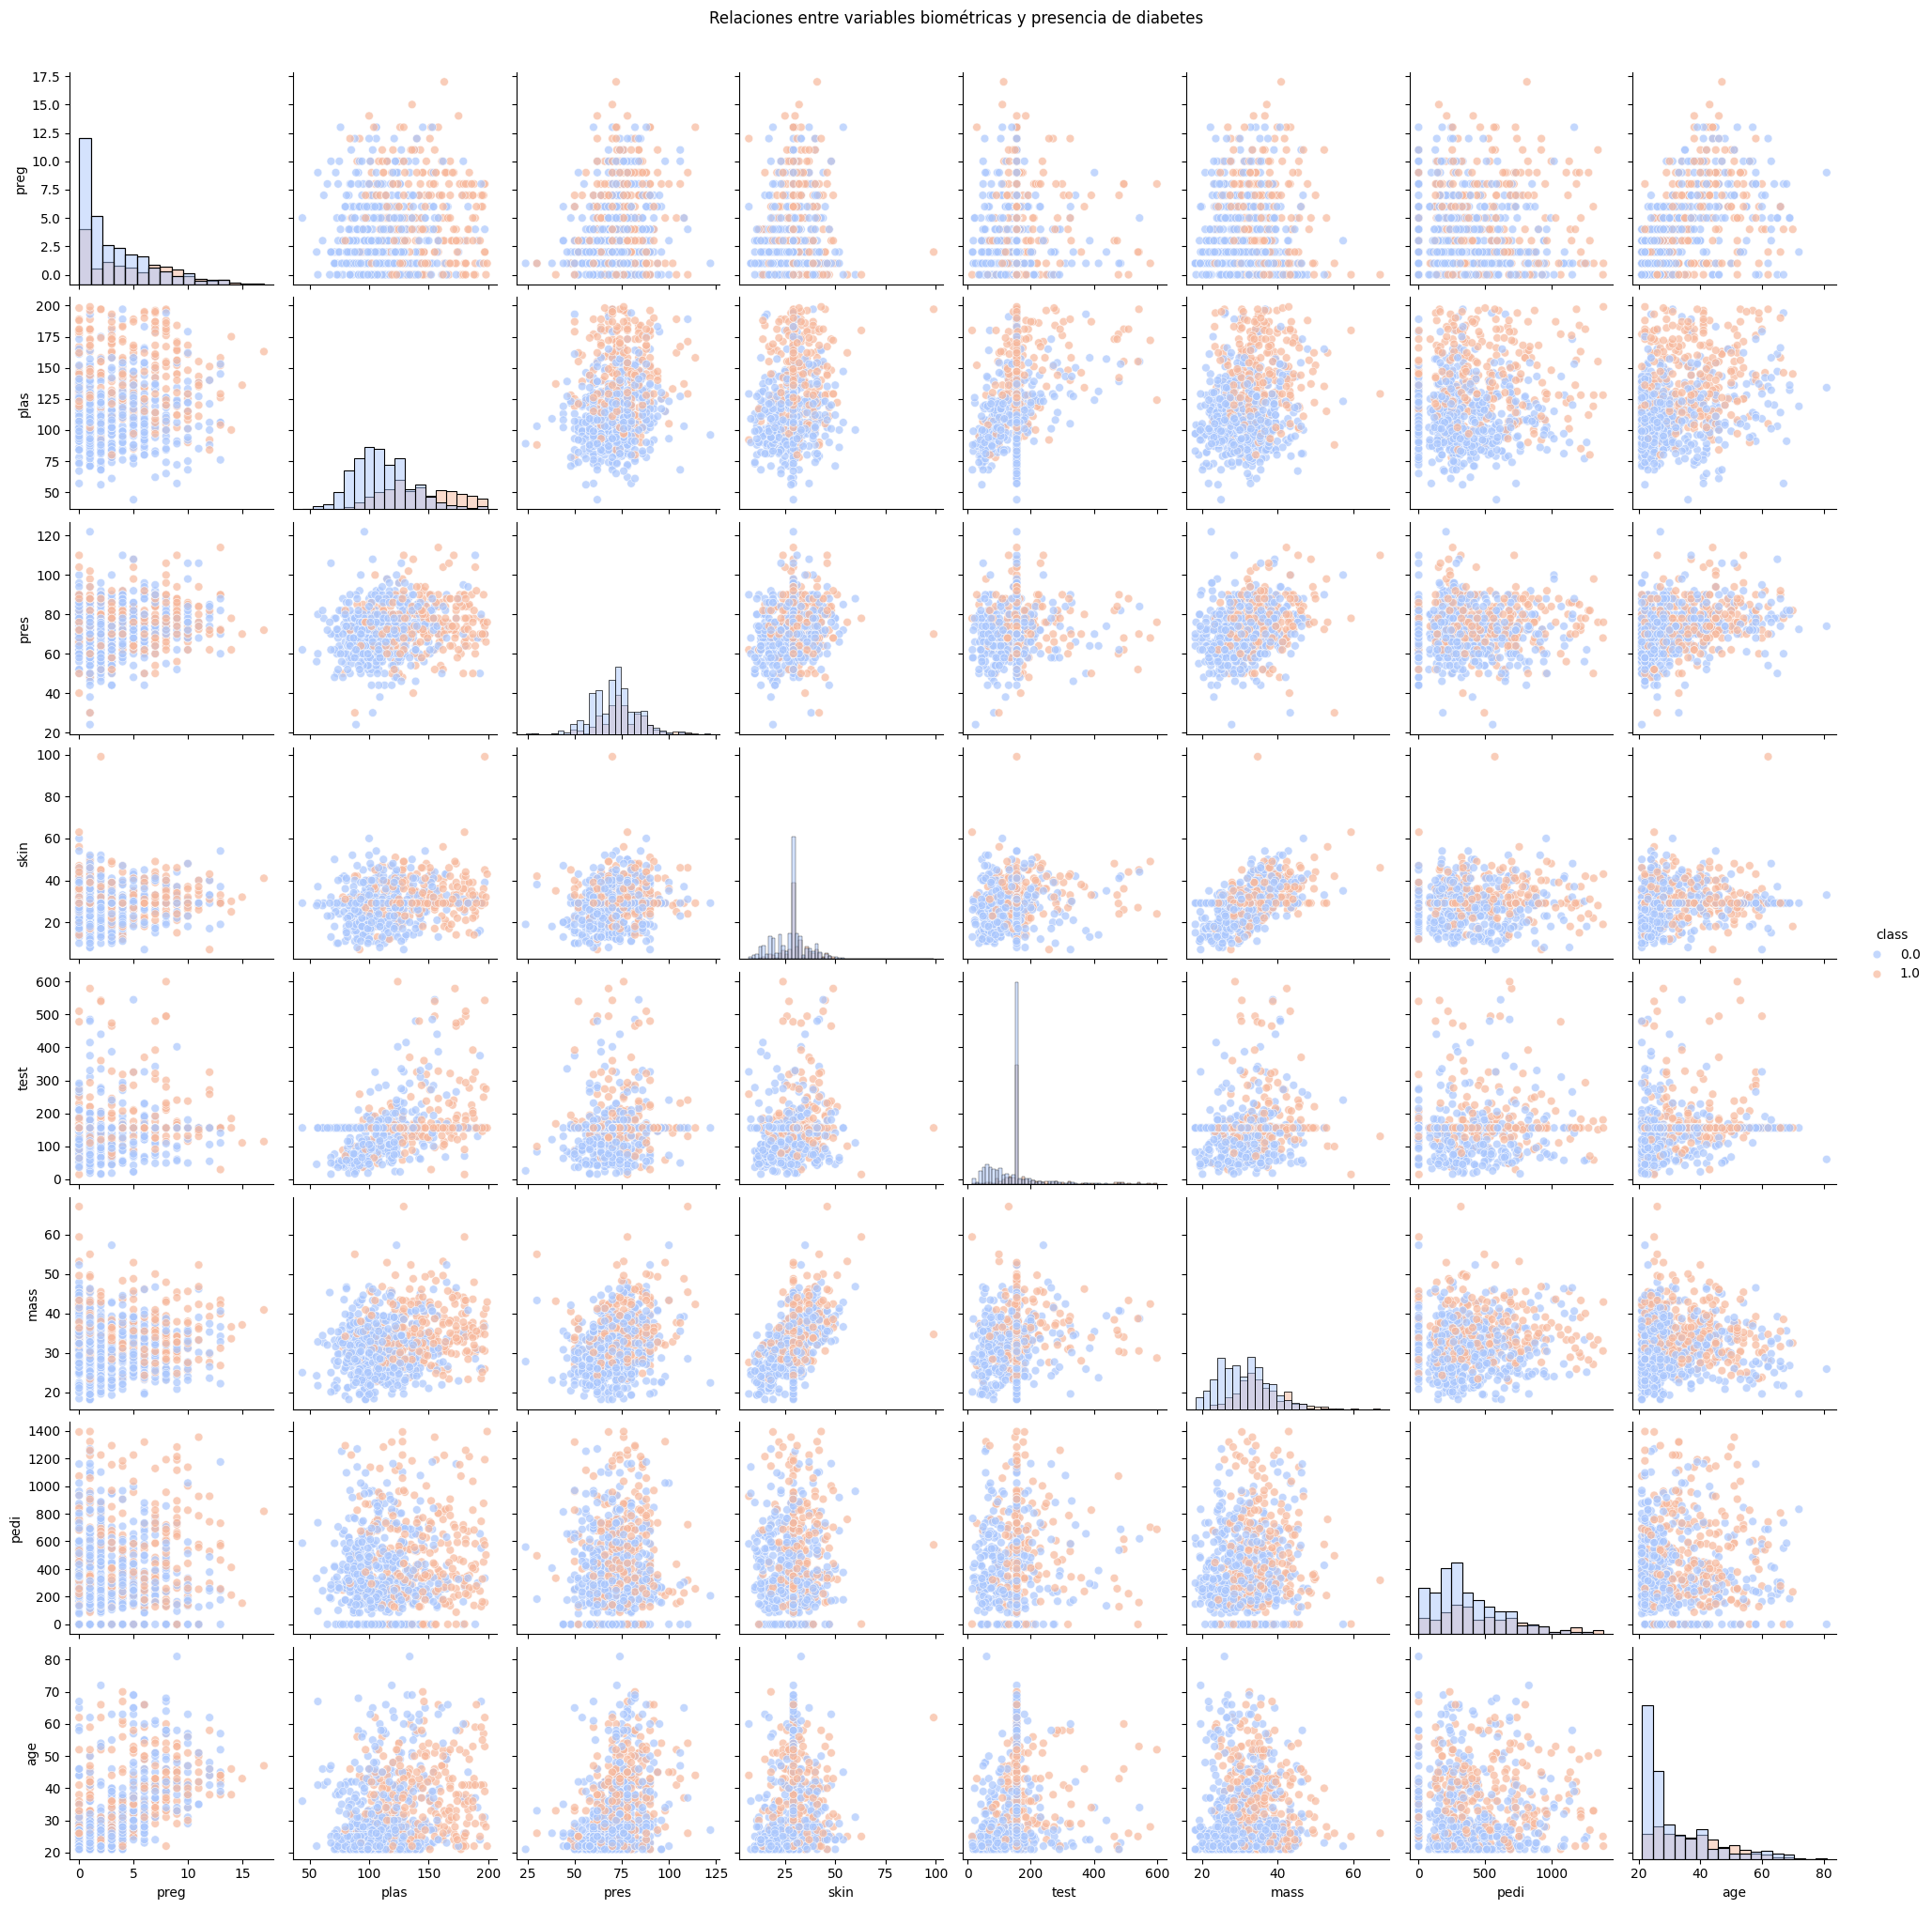

In [372]:
# Creamos un gráfico de pares (pairplot) que muestra la relación entre todas las variables numéricas del DataFrame
sns.pairplot(df,
             hue='class',                # Colorea los puntos según la variable 'class' (0 = no diabético, 1 = diabético)
             diag_kind='hist',           # En la diagonal, muestra histogramas en lugar de densidades KDE
             palette='coolwarm',         # Define la paleta de colores utilizada para las clases
             plot_kws={'alpha': 0.7,     # Ajusta la transparencia de los puntos (0 = transparente, 1 = opaco)
                       's': 40}          # Define el tamaño de los puntos en los diagramas de dispersión            
             )

# Agrega un título general a toda la figura con separación vertical (y=1.02 evita que se superponga con el gráfico)
plt.suptitle("Relaciones entre variables biométricas y presencia de diabetes", y=1.02 )

# Muestra la figura en pantalla
plt.show()


### La clase de objetos DataFrame

Un objeto del tipo DataFrame define un conjunto de datos estructurado en forma de tabla donde cada columna es un objeto de tipo Series, es decir, todos los datos de una misma columna son del mismo tipo. Las filas son registros que pueden contender datos de distintos tipos.

Un DataFrame contiene dos índices, uno para las filas y otro para las columnas, y se puede acceder a sus elementos mediante los nombres de las filas y las columnas.

<div align="center">
    <img src="6.png" alt="Estructura del dataframe1" width="500">
    <img src="7.png" alt="Estructura del dataframe2" width="500">
</div>

```python
#Esta función devuelve un objeto df, de tipo dataFrame de la librreía Pandas. Verificamos con type(df)
file ='pima-indians-diabetes.csv'
df = pd.read_csv(file)


In [373]:
type(df)

pandas.core.frame.DataFrame

### 1.2 Conceptos básicos de slicing

Uso de `iloc[]` en pandas

**`iloc[]`** en pandas se utiliza para seleccionar datos por posición numérica dentro de un `DataFrame` o un objeto `Series`.  
Permite acceder a filas y columnas en base a sus índices enteros, no en sus etiquetas o nombres.

La sintaxis básica es:

```python
df.iloc[fila, columna]


fila → posición o rango de filas a seleccionar.

columna → posición o rango de columnas a seleccionar.

Ambos parámetros son opcionales y se pueden combinar con listas, rangos (:) o pasos (::).

In [374]:
# 1) Primera fila: índice primera fila 0.
df.iloc[0]

preg       1.000000
plas     148.000000
pres      72.000000
skin      35.000000
test     155.548223
mass      33.600000
pedi     627.000000
age       50.000000
class      1.000000
Name: 0, dtype: float64

In [375]:
# 2) Filas de índice 0 a 4. El índice 5 no se incluye.
df.iloc[0:5]

,preg,plas,pres,skin,test,mass,pedi,age,class
0,1.0,148.0,72.0,35.00000,155.548223,33.6,627.0,50.000000,1.0
1,1.0,85.0,66.0,29.00000,155.548223,26.6,351.0,31.000000,0.0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,672.0,33.248366,1.0
3,1.0,89.0,66.0,23.00000,94.000000,28.1,167.0,21.000000,0.0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,334.0,33.000000,1.0


In [376]:
# 3) con iloc[] las 5 primeras filas de las columnas 'preg' y 'plas'
df[['preg','plas']].iloc[0:5]

,preg,plas
0,1.0,148.0
1,1.0,85.0
2,8.0,183.0
3,1.0,89.0
4,0.0,137.0


In [377]:
# 4)Filas específicas del dataframe
df.iloc[[0, 100, 200, 300]]

,preg,plas,pres,skin,test,mass,pedi,age,class
0,1.0,148.0,72.000000,35.00000,155.548223,33.6,627.0,50.0,1.0
100,1.0,163.0,72.000000,29.15342,155.548223,39.0,1222.0,33.0,1.0
200,0.0,113.0,80.000000,16.00000,155.548223,31.0,874.0,21.0,0.0
300,0.0,167.0,72.405184,29.15342,155.548223,32.3,839.0,30.0,1.0


In [378]:
# 5) Seleccionar todas las filas pero un rango de columnas 0:3 (columnas con índices 0,1,2).
# Es decir, Devuelve todas las filas, pero solo las tres primeras columnas: preg, plas y pres.
df.iloc[:, 0:3]

,preg,plas,pres
0,1.0,148.0,72.0
1,1.0,85.0,66.0
2,8.0,183.0,64.0
3,1.0,89.0,66.0
4,0.0,137.0,40.0
...,...,...,...
763,10.0,101.0,76.0
764,2.0,122.0,70.0
765,5.0,121.0,72.0
766,1.0,126.0,60.0


In [379]:
# 6) Devuelve las filas 0 a 4 y las columnas 0 a 3: preg, plas, pres, skin.
df.iloc[0:5, 0:4]

,preg,plas,pres,skin
0,1.0,148.0,72.0,35.00000
1,1.0,85.0,66.0,29.00000
2,8.0,183.0,64.0,29.15342
3,1.0,89.0,66.0,23.00000
4,0.0,137.0,40.0,35.00000


In [380]:
# 7) Selecciona el valor que se encuentra en la fila 4 (quinta fila) y en la columna 1 (plas, concentración de glucosa).
print(df.iloc[4, 1])

137.0


In [381]:
# 8) Devuelve las filas 100 a 104 y las columnas mass, pedi, age, class. Útil para explorar una porción específica del dataset.
df.iloc[100:105, 5:9]

,mass,pedi,age,class
100,39.0,1222.00,33.0,1.0
101,26.1,179.00,22.0,0.0
102,22.5,262.00,21.0,0.0
103,26.6,283.00,24.0,0.0
104,39.6,0.93,27.0,0.0


In [382]:
# 9)
# inicio = 100 Empieza en la fila 100 (la indexación es 0-based).
# fin = 150 Llega hasta la fila 149 (el límite superior no se incluye).
# paso = 10  Salta de 10 en 10 filas.
df.iloc[100:150:10] #No olvidar que no se incluye el última índice del intervalo

# Equivalente a: df.iloc[[100, 110, 120, 130, 140]]

,preg,plas,pres,skin,test,mass,pedi,age,class
100,1.0,163.0,72.0,29.15342,155.548223,39.0,1222.0,33.0,1.0
110,3.0,171.0,72.0,33.00000,135.000000,33.3,199.0,24.0,1.0
120,0.0,162.0,76.0,56.00000,100.000000,53.2,759.0,25.0,1.0
130,4.0,173.0,70.0,14.00000,168.000000,29.7,361.0,33.0,1.0
140,3.0,128.0,78.0,29.15342,155.548223,21.1,268.0,55.0,0.0


In [ ]:
# 10) Las últimas 5 filas del dataframe.
df.iloc[-5:]

,preg,plas,pres,skin,test,mass,pedi,age,class,grupo_edad,alto_plas
763,10.0,101.0,76.0,48.00000,180.000000,32.9,171.00,63.0,1.0,60.0,bajo
764,2.0,122.0,70.0,27.00000,155.548223,36.8,0.34,27.0,0.0,20.0,alto
765,5.0,121.0,72.0,23.00000,112.000000,26.2,245.00,30.0,0.0,30.0,alto
766,1.0,126.0,60.0,29.15342,155.548223,30.1,349.00,47.0,1.0,40.0,alto
767,1.0,93.0,70.0,31.00000,155.548223,30.4,315.00,23.0,0.0,20.0,bajo


In [384]:
# 11) Mostrar las últimas 5 filas usando índices negativos
df.iloc[-5:-1] #El índice de la última fila de un dataframe se representa también con -1. Pero, en este caso, NO LA INCLUYE!!

,preg,plas,pres,skin,test,mass,pedi,age,class
763,10.0,101.0,76.0,48.00000,180.000000,32.9,171.00,63.0,0.0
764,2.0,122.0,70.0,27.00000,155.548223,36.8,0.34,27.0,0.0
765,5.0,121.0,72.0,23.00000,112.000000,26.2,245.00,30.0,0.0
766,1.0,126.0,60.0,29.15342,155.548223,30.1,349.00,47.0,1.0


In [385]:
# 12) Devuelve una fila cada 100 posiciones (por ejemplo, filas 0, 100, 200, …).
df.iloc[::100]

,preg,plas,pres,skin,test,mass,pedi,age,class
0,1.0,148.0,72.000000,35.00000,155.548223,33.6,627.0,50.0,1.0
100,1.0,163.0,72.000000,29.15342,155.548223,39.0,1222.0,33.0,1.0
200,0.0,113.0,80.000000,16.00000,155.548223,31.0,874.0,21.0,0.0
300,0.0,167.0,72.405184,29.15342,155.548223,32.3,839.0,30.0,1.0
400,4.0,95.0,64.000000,29.15342,155.548223,32.0,161.0,31.0,1.0
500,2.0,117.0,90.000000,19.00000,71.000000,25.2,313.0,21.0,0.0
600,1.0,108.0,88.000000,19.00000,155.548223,27.1,0.4,24.0,0.0
700,2.0,122.0,76.000000,27.00000,200.000000,35.9,483.0,26.0,0.0


In [439]:
# 13) Desde la fila 200 hasta el final
df.iloc[200:]

,preg,plas,pres,skin,test,mass,pedi,age,class,grupo_edad,alto_plas
200,0.0,113.0,80.0,16.00000,155.548223,31.0,874.00,21.0,0.0,20.0,bajo
201,1.0,138.0,82.0,29.15342,155.548223,40.1,236.00,28.0,0.0,20.0,alto
202,0.0,108.0,68.0,20.00000,155.548223,27.3,787.00,32.0,0.0,30.0,bajo
203,2.0,99.0,70.0,16.00000,44.000000,20.4,235.00,27.0,0.0,20.0,bajo
204,6.0,103.0,72.0,32.00000,190.000000,37.7,324.00,55.0,0.0,50.0,bajo
...,...,...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.00000,180.000000,32.9,171.00,63.0,1.0,60.0,bajo
764,2.0,122.0,70.0,27.00000,155.548223,36.8,0.34,27.0,0.0,20.0,alto
765,5.0,121.0,72.0,23.00000,112.000000,26.2,245.00,30.0,0.0,30.0,alto
766,1.0,126.0,60.0,29.15342,155.548223,30.1,349.00,47.0,1.0,40.0,alto


In [387]:
# 14) Desde el inicio hasta la fila 10 (SIN INCLUIR 10 !!!!)
df.iloc[:10]

,preg,plas,pres,skin,test,mass,pedi,age,class
0,1.0,148.0,72.000000,35.00000,155.548223,33.600000,627.0,50.000000,1.0
1,1.0,85.0,66.000000,29.00000,155.548223,26.600000,351.0,31.000000,0.0
2,8.0,183.0,64.000000,29.15342,155.548223,23.300000,672.0,33.248366,1.0
3,1.0,89.0,66.000000,23.00000,94.000000,28.100000,167.0,21.000000,0.0
4,0.0,137.0,40.000000,35.00000,168.000000,43.100000,334.0,33.000000,1.0
5,5.0,116.0,74.000000,29.15342,155.548223,25.600000,201.0,33.248366,0.0
6,3.0,78.0,50.000000,32.00000,88.000000,31.000000,248.0,26.000000,1.0
7,10.0,115.0,72.405184,29.15342,155.548223,35.300000,134.0,29.000000,0.0
8,2.0,197.0,70.000000,45.00000,543.000000,30.500000,158.0,53.000000,1.0
9,8.0,125.0,96.000000,29.15342,155.548223,32.457464,232.0,54.000000,1.0


In [388]:
# 15) Filas del 50 al 70, tomando una cada 5. NO INCLUYE LA ÚLTIMA (LA 70)!!!
df.iloc[50:70:5]

,preg,plas,pres,skin,test,mass,pedi,age,class
50,1.0,103.0,80.000000,11.00000,82.000000,19.400000,491.0,22.0,0.0
55,1.0,73.0,50.000000,10.00000,155.548223,23.000000,248.0,21.0,0.0
60,2.0,84.0,72.405184,29.15342,155.548223,32.457464,304.0,21.0,0.0
65,5.0,99.0,74.000000,27.00000,155.548223,29.000000,203.0,32.0,0.0


#### Slicing sin índices usando `iloc[]` en pandas

En pandas, el método **`iloc[]`** se utiliza para seleccionar **filas y columnas por posición numérica**.  
Cuando usamos slicing dentro de `iloc[]` sin incluir alguno de los índices (inicio, fin o paso), pandas aplica los **valores por defecto**, exactamente igual que Python lo hace en listas o arreglos.



#### Sintaxis general de `iloc[]`

```python
df.iloc[inicio:fin:paso, inicio_col:fin_col:paso_col]


In [389]:
# 16) Muestra todo el DataFrame. Es equivalente a df o df[:].
df.iloc[:, :]

,preg,plas,pres,skin,test,mass,pedi,age,class
0,1.0,148.0,72.0,35.00000,155.548223,33.6,627.00,50.000000,1.0
1,1.0,85.0,66.0,29.00000,155.548223,26.6,351.00,31.000000,0.0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,672.00,33.248366,1.0
3,1.0,89.0,66.0,23.00000,94.000000,28.1,167.00,21.000000,0.0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,334.00,33.000000,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.00000,180.000000,32.9,171.00,63.000000,0.0
764,2.0,122.0,70.0,27.00000,155.548223,36.8,0.34,27.000000,0.0
765,5.0,121.0,72.0,23.00000,112.000000,26.2,245.00,30.000000,0.0
766,1.0,126.0,60.0,29.15342,155.548223,30.1,349.00,47.000000,1.0


In [390]:
# 17) Devuelve todas las filas pero solo las columnas 0, 1 y 2 (preg, plas, pres).
df.iloc[:, :3]

,preg,plas,pres
0,1.0,148.0,72.0
1,1.0,85.0,66.0
2,8.0,183.0,64.0
3,1.0,89.0,66.0
4,0.0,137.0,40.0
...,...,...,...
763,10.0,101.0,76.0
764,2.0,122.0,70.0
765,5.0,121.0,72.0
766,1.0,126.0,60.0


In [391]:
# 18) Devuelve las filas 0, 2, 4, 6, etc.
# Seleccionar una de cada dos filas. 
df.iloc[::2]


,preg,plas,pres,skin,test,mass,pedi,age,class
0,1.0,148.0,72.0,35.00000,155.548223,33.6,627.00,50.000000,1.0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,672.00,33.248366,1.0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,334.00,33.000000,1.0
6,3.0,78.0,50.0,32.00000,88.000000,31.0,248.00,26.000000,1.0
8,2.0,197.0,70.0,45.00000,543.000000,30.5,158.00,53.000000,1.0
...,...,...,...,...,...,...,...,...,...
758,1.0,106.0,76.0,29.15342,155.548223,37.5,197.00,26.000000,0.0
760,2.0,88.0,58.0,26.00000,16.000000,28.4,766.00,22.000000,0.0
762,9.0,89.0,62.0,29.15342,155.548223,22.5,142.00,33.000000,0.0
764,2.0,122.0,70.0,27.00000,155.548223,36.8,0.34,27.000000,0.0


In [392]:
# 19) Selecciona filas 0 a 9 (10 filas) y todas las columnas.
df.iloc[:10, :]

,preg,plas,pres,skin,test,mass,pedi,age,class
0,1.0,148.0,72.000000,35.00000,155.548223,33.600000,627.0,50.000000,1.0
1,1.0,85.0,66.000000,29.00000,155.548223,26.600000,351.0,31.000000,0.0
2,8.0,183.0,64.000000,29.15342,155.548223,23.300000,672.0,33.248366,1.0
3,1.0,89.0,66.000000,23.00000,94.000000,28.100000,167.0,21.000000,0.0
4,0.0,137.0,40.000000,35.00000,168.000000,43.100000,334.0,33.000000,1.0
5,5.0,116.0,74.000000,29.15342,155.548223,25.600000,201.0,33.248366,0.0
6,3.0,78.0,50.000000,32.00000,88.000000,31.000000,248.0,26.000000,1.0
7,10.0,115.0,72.405184,29.15342,155.548223,35.300000,134.0,29.000000,0.0
8,2.0,197.0,70.000000,45.00000,543.000000,30.500000,158.0,53.000000,1.0
9,8.0,125.0,96.000000,29.15342,155.548223,32.457464,232.0,54.000000,1.0


In [393]:
# 20) Desde el incio hasta el final, cada 100 filas
df.iloc[::100]

,preg,plas,pres,skin,test,mass,pedi,age,class
0,1.0,148.0,72.000000,35.00000,155.548223,33.6,627.0,50.0,1.0
100,1.0,163.0,72.000000,29.15342,155.548223,39.0,1222.0,33.0,1.0
200,0.0,113.0,80.000000,16.00000,155.548223,31.0,874.0,21.0,0.0
300,0.0,167.0,72.405184,29.15342,155.548223,32.3,839.0,30.0,1.0
400,4.0,95.0,64.000000,29.15342,155.548223,32.0,161.0,31.0,1.0
500,2.0,117.0,90.000000,19.00000,71.000000,25.2,313.0,21.0,0.0
600,1.0,108.0,88.000000,19.00000,155.548223,27.1,0.4,24.0,0.0
700,2.0,122.0,76.000000,27.00000,200.000000,35.9,483.0,26.0,0.0


In [394]:
# 22) Devuelve todas las filas a partir de la posición 100 (inclusive) hasta el final del DataFrame, con todas las columnas.
df.iloc[100:, :]

,preg,plas,pres,skin,test,mass,pedi,age,class
100,1.0,163.0,72.0,29.15342,155.548223,39.0,1222.00,33.0,1.0
101,1.0,151.0,60.0,29.15342,155.548223,26.1,179.00,22.0,0.0
102,0.0,125.0,96.0,29.15342,155.548223,22.5,262.00,21.0,0.0
103,1.0,81.0,72.0,18.00000,40.000000,26.6,283.00,24.0,0.0
104,2.0,85.0,65.0,29.15342,155.548223,39.6,0.93,27.0,0.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.00000,180.000000,32.9,171.00,63.0,0.0
764,2.0,122.0,70.0,27.00000,155.548223,36.8,0.34,27.0,0.0
765,5.0,121.0,72.0,23.00000,112.000000,26.2,245.00,30.0,0.0
766,1.0,126.0,60.0,29.15342,155.548223,30.1,349.00,47.0,1.0


In [395]:
# 23) Devuelve todas las filas y las columnas desde la posición 5 en adelante → mass, pedi, age, class.
df.iloc[:, 5:]

,mass,pedi,age,class
0,33.6,627.00,50.000000,1.0
1,26.6,351.00,31.000000,0.0
2,23.3,672.00,33.248366,1.0
3,28.1,167.00,21.000000,0.0
4,43.1,334.00,33.000000,1.0
...,...,...,...,...
763,32.9,171.00,63.000000,0.0
764,36.8,0.34,27.000000,0.0
765,26.2,245.00,30.000000,0.0
766,30.1,349.00,47.000000,1.0


In [396]:
# 24) Devuelve una fila cada 2 posiciones (0, 2, 4, 6, …).
df.iloc[::2, :]

,preg,plas,pres,skin,test,mass,pedi,age,class
0,1.0,148.0,72.0,35.00000,155.548223,33.6,627.00,50.000000,1.0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,672.00,33.248366,1.0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,334.00,33.000000,1.0
6,3.0,78.0,50.0,32.00000,88.000000,31.0,248.00,26.000000,1.0
8,2.0,197.0,70.0,45.00000,543.000000,30.5,158.00,53.000000,1.0
...,...,...,...,...,...,...,...,...,...
758,1.0,106.0,76.0,29.15342,155.548223,37.5,197.00,26.000000,0.0
760,2.0,88.0,58.0,26.00000,16.000000,28.4,766.00,22.000000,0.0
762,9.0,89.0,62.0,29.15342,155.548223,22.5,142.00,33.000000,0.0
764,2.0,122.0,70.0,27.00000,155.548223,36.8,0.34,27.000000,0.0


In [397]:
# 25) Devuelve todas las filas, pero solo una columna cada tres (índices 0, 3, 6 → preg, skin, pedi).
df.iloc[:, ::3]

,preg,skin,pedi
0,1.0,35.00000,627.00
1,1.0,29.00000,351.00
2,8.0,29.15342,672.00
3,1.0,23.00000,167.00
4,0.0,35.00000,334.00
...,...,...,...
763,10.0,48.00000,171.00
764,2.0,27.00000,0.34
765,5.0,23.00000,245.00
766,1.0,29.15342,349.00


In [398]:
# 26) Filas 50 a 100, saltando de 10 en 10
df.iloc[50:100:10, :]

,preg,plas,pres,skin,test,mass,pedi,age,class
50,1.0,103.0,80.000000,11.00000,82.000000,19.400000,491.00,22.0,0.0
60,2.0,84.0,72.405184,29.15342,155.548223,32.457464,304.00,21.0,0.0
70,2.0,100.0,66.000000,20.00000,90.000000,32.900000,867.00,28.0,1.0
80,3.0,113.0,44.000000,13.00000,155.548223,22.400000,0.14,22.0,0.0
90,1.0,80.0,55.000000,29.15342,155.548223,19.100000,258.00,21.0,0.0


In [399]:
# 27) Columnas 0 a 8, saltando de 2 en 2. Devuelve las columnas 0, 2, 4, 6, 8 → preg, pres, test, pedi, class.
df.iloc[:, 0:9:2]

,preg,pres,test,pedi,class
0,1.0,72.0,155.548223,627.00,1.0
1,1.0,66.0,155.548223,351.00,0.0
2,8.0,64.0,155.548223,672.00,1.0
3,1.0,66.0,94.000000,167.00,0.0
4,0.0,40.0,168.000000,334.00,1.0
...,...,...,...,...,...
763,10.0,76.0,180.000000,171.00,0.0
764,2.0,70.0,155.548223,0.34,0.0
765,5.0,72.0,112.000000,245.00,0.0
766,1.0,60.0,155.548223,349.00,1.0


In [400]:
# 28) Invertir el orden de las filas. Devuelve el DataFrame de abajo hacia arriba (última fila primero).
df.iloc[::-1, :]

,preg,plas,pres,skin,test,mass,pedi,age,class
767,1.0,93.0,70.0,31.00000,155.548223,30.4,315.00,23.000000,0.0
766,1.0,126.0,60.0,29.15342,155.548223,30.1,349.00,47.000000,1.0
765,5.0,121.0,72.0,23.00000,112.000000,26.2,245.00,30.000000,0.0
764,2.0,122.0,70.0,27.00000,155.548223,36.8,0.34,27.000000,0.0
763,10.0,101.0,76.0,48.00000,180.000000,32.9,171.00,63.000000,0.0
...,...,...,...,...,...,...,...,...,...
4,0.0,137.0,40.0,35.00000,168.000000,43.1,334.00,33.000000,1.0
3,1.0,89.0,66.0,23.00000,94.000000,28.1,167.00,21.000000,0.0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,672.00,33.248366,1.0
1,1.0,85.0,66.0,29.00000,155.548223,26.6,351.00,31.000000,0.0


In [401]:
# 29) Invertir columnas. Muestra todas las filas pero con las columnas en orden inverso.(class será la primera y preg la última).
df.iloc[:, ::-1]


,class,age,pedi,mass,test,skin,pres,plas,preg
0,1.0,50.000000,627.00,33.6,155.548223,35.00000,72.0,148.0,1.0
1,0.0,31.000000,351.00,26.6,155.548223,29.00000,66.0,85.0,1.0
2,1.0,33.248366,672.00,23.3,155.548223,29.15342,64.0,183.0,8.0
3,0.0,21.000000,167.00,28.1,94.000000,23.00000,66.0,89.0,1.0
4,1.0,33.000000,334.00,43.1,168.000000,35.00000,40.0,137.0,0.0
...,...,...,...,...,...,...,...,...,...
763,0.0,63.000000,171.00,32.9,180.000000,48.00000,76.0,101.0,10.0
764,0.0,27.000000,0.34,36.8,155.548223,27.00000,70.0,122.0,2.0
765,0.0,30.000000,245.00,26.2,112.000000,23.00000,72.0,121.0,5.0
766,1.0,47.000000,349.00,30.1,155.548223,29.15342,60.0,126.0,1.0


In [402]:
# 30) Slicing parcial en ambos ejes. Devuelve las filas 100 a 109 y las primeras 4 columnas :preg, plas, pres, skin.
df.iloc[100:110, :4]

,preg,plas,pres,skin
100,1.0,163.0,72.0,29.15342
101,1.0,151.0,60.0,29.15342
102,0.0,125.0,96.0,29.15342
103,1.0,81.0,72.0,18.00000
104,2.0,85.0,65.0,29.15342
105,1.0,126.0,56.0,29.00000
106,1.0,96.0,122.0,29.15342
107,4.0,144.0,58.0,28.00000
108,3.0,83.0,58.0,31.00000
109,0.0,95.0,85.0,25.00000


#### Uso de `loc[]` en pandas  


El método **`loc[]`** de pandas se utiliza para **seleccionar datos por etiquetas** (nombres de filas o columnas) dentro de un `DataFrame`.  
A diferencia de `iloc[]`, que trabaja con **índices numéricos**, `loc[]` accede a los datos usando **nombres o etiquetas reales** del índice y las columnas.

Es decir:

`iloc[]` = selección por posición  
`loc[]` = selección por nombre o etiqueta

#### Sintaxis general de `loc[]`

```python
df.loc[fila, columna]


fila → etiqueta o rango de etiquetas de las filas.

columna → etiqueta o rango de etiquetas de las columnas.

Ambos parámetros pueden ser:

-Un solo nombre. Por ejemplo: 'age'.

-Una lista. Por ejemplo: ['plas', 'mass']

-Un rango de etiquetas. Por ejemplo: 'plas':'mass'

-Una condición lógica. Por ejemplo: df['age'] > 30

In [403]:
# 31) Devuelve la primera fila, identificada por la etiqueta 0.
df.loc[0]

preg       1.000000
plas     148.000000
pres      72.000000
skin      35.000000
test     155.548223
mass      33.600000
pedi     627.000000
age       50.000000
class      1.000000
Name: 0, dtype: float64

In [404]:
# 32) Devuelve las filas desde la 10 hasta la 15, incluyendo ambas. A diferencia de iloc, loc sí incluye el límite superior del rango.
df.loc[10:15]

,preg,plas,pres,skin,test,mass,pedi,age,class
10,4.0,121.7021,92.000000,29.15342,155.548223,37.6,191.0,30.000000,0.0
11,10.0,168.0000,74.000000,29.15342,155.548223,38.0,537.0,34.000000,1.0
12,10.0,139.0000,80.000000,29.15342,155.548223,27.1,334.0,57.000000,0.0
13,1.0,189.0000,60.000000,23.00000,155.548223,30.1,398.0,59.000000,1.0
14,5.0,166.0000,72.000000,19.00000,175.000000,25.8,587.0,51.000000,1.0
15,7.0,100.0000,72.405184,29.15342,155.548223,30.0,484.0,33.248366,1.0


In [405]:
# 33)
#   :  significa todas las filas. ['preg', 'plas', 'mass']  selecciona solo esas columnas.
df.loc[:, ['preg', 'plas', 'mass']]

,preg,plas,mass
0,1.0,148.0,33.6
1,1.0,85.0,26.6
2,8.0,183.0,23.3
3,1.0,89.0,28.1
4,0.0,137.0,43.1
...,...,...,...
763,10.0,101.0,32.9
764,2.0,122.0,36.8
765,5.0,121.0,26.2
766,1.0,126.0,30.1


In [441]:
# 34) Devuelve las filas 0 a 4 y las columnas 'preg', 'plas', y 'class'.
df.loc[0:4, ['preg', 'plas', 'class']]

,preg,plas,class
0,1.0,148.0,0.0
1,1.0,85.0,0.0
2,8.0,183.0,1.0
3,1.0,89.0,0.0
4,0.0,137.0,1.0


In [407]:
# 35) Devuelve las filas 0 a 4 y las columnas desde 'preg' hasta 'mass', ambas incluidas.
df.loc[0:4, 'preg':'mass']

,preg,plas,pres,skin,test,mass
0,1.0,148.0,72.0,35.00000,155.548223,33.6
1,1.0,85.0,66.0,29.00000,155.548223,26.6
2,8.0,183.0,64.0,29.15342,155.548223,23.3
3,1.0,89.0,66.0,23.00000,94.000000,28.1
4,0.0,137.0,40.0,35.00000,168.000000,43.1


In [408]:
# 36) Pacientes con nivel de glucosa (plas) mayor a 150. Devuelve todas las filas donde el valor de 'plas' es mayor que 150.
df.loc[df['plas'] > 150]

,preg,plas,pres,skin,test,mass,pedi,age,class
2,8.0,183.0,64.0,29.15342,155.548223,23.3,672.0,33.248366,1.0
8,2.0,197.0,70.0,45.00000,543.000000,30.5,158.0,53.000000,1.0
11,10.0,168.0,74.0,29.15342,155.548223,38.0,537.0,34.000000,1.0
13,1.0,189.0,60.0,23.00000,155.548223,30.1,398.0,59.000000,1.0
14,5.0,166.0,72.0,19.00000,175.000000,25.8,587.0,51.000000,1.0
...,...,...,...,...,...,...,...,...,...
749,6.0,162.0,62.0,29.15342,155.548223,24.3,178.0,50.000000,1.0
753,0.0,181.0,88.0,44.00000,510.000000,43.3,222.0,26.000000,1.0
754,8.0,154.0,78.0,32.00000,155.548223,32.4,443.0,45.000000,1.0
759,6.0,190.0,92.0,29.15342,155.548223,35.5,278.0,66.000000,1.0


In [409]:
# 37)
# Cada condición debe ir entre paréntesis. El operador & significa “y”, mientras que | significa “o”.
# Mujeres con más de 30 años y masa corporal (mass) mayor a 30
df.loc[(df['age'] > 30) & (df['mass'] > 30)]


,preg,plas,pres,skin,test,mass,pedi,age,class
0,1.0,148.0,72.0,35.00000,155.548223,33.600000,627.0,50.0,1.0
4,0.0,137.0,40.0,35.00000,168.000000,43.100000,334.0,33.0,1.0
8,2.0,197.0,70.0,45.00000,543.000000,30.500000,158.0,53.0,1.0
9,8.0,125.0,96.0,29.15342,155.548223,32.457464,232.0,54.0,1.0
11,10.0,168.0,74.0,29.15342,155.548223,38.000000,537.0,34.0,1.0
...,...,...,...,...,...,...,...,...,...
757,0.0,123.0,72.0,29.15342,155.548223,36.300000,258.0,52.0,1.0
759,6.0,190.0,92.0,29.15342,155.548223,35.500000,278.0,66.0,1.0
761,9.0,170.0,74.0,31.00000,155.548223,44.000000,403.0,43.0,1.0
763,10.0,101.0,76.0,48.00000,180.000000,32.900000,171.0,63.0,0.0


In [410]:
# 38)
# Cambiar el valor de 'class' a 0 en la fila con índice 0
df.loc[0, 'class'] = 0

In [411]:
# 39) Establece class = 1 para todos los pacientes mayores de 60 años.
df.loc[df['age'] > 60, 'class'] = 1

In [412]:
# 40)
df.loc[100:105, 'plas':'mass']

,plas,pres,skin,test,mass
100,163.0,72.0,29.15342,155.548223,39.0
101,151.0,60.0,29.15342,155.548223,26.1
102,125.0,96.0,29.15342,155.548223,22.5
103,81.0,72.0,18.00000,40.000000,26.6
104,85.0,65.0,29.15342,155.548223,39.6
105,126.0,56.0,29.00000,152.000000,28.7


#### Ejemplos sintaxis básica de loc[]

```python

df.loc[fila, columna]

df.loc[5]                      #fila con etiqueta 5

df.loc[10:15]                  #filas 10 a 15 (incluye 15)

df.loc[:, 'plas']              #columna 'plas' con todas las filas

df.loc[:, ['preg','plas']]     #todas las filas con las columnas seleccionadas 'preg' y 'plas'

df.loc[0:4, 'preg':'mass']     #filas 0–4, columnas 'preg' a 'mass'

df.loc[df['plas'] > 150]       #filas del dataframe con valores de la columna 'plas' que cumplen la condición > 150

df.loc[df['age'] > 60, 'class'] = 1   #asigna el valor 1 a las celdas que satisfacen la condición lógica


| Característica         | `iloc[]`                  | `loc[]`                       |
| ---------------------- | ------------------------- | ----------------------------- |
| Tipo de acceso         | Por **posición numérica** | Por **etiqueta o nombre**     |
| Incluye el valor final | No                        | Sí                            |
| Ejemplo                | `df.iloc[0:5, 0:3]`       | `df.loc[0:5, 'preg':'pres']`  |
| Permite condiciones    | No directamente           | Sí, con expresiones booleanas |


### Filtros en Python

In [413]:
# 1) Filtra filas con age > 50
df_age_gt_50 = df[df["age"] > 50]  # Filas donde la edad es mayor que 50
df_age_gt_50

,preg,plas,pres,skin,test,mass,pedi,age,class
8,2.0,197.0,70.0,45.00000,543.000000,30.500000,158.00,53.0,1.0
9,8.0,125.0,96.0,29.15342,155.548223,32.457464,232.00,54.0,1.0
12,10.0,139.0,80.0,29.15342,155.548223,27.100000,334.00,57.0,0.0
13,1.0,189.0,60.0,23.00000,155.548223,30.100000,398.00,59.0,1.0
14,5.0,166.0,72.0,19.00000,175.000000,25.800000,587.00,51.0,1.0
...,...,...,...,...,...,...,...,...,...
719,5.0,97.0,76.0,27.00000,155.548223,35.600000,378.00,52.0,1.0
734,2.0,105.0,75.0,29.15342,155.548223,23.300000,0.56,53.0,0.0
757,0.0,123.0,72.0,29.15342,155.548223,36.300000,258.00,52.0,1.0
759,6.0,190.0,92.0,29.15342,155.548223,35.500000,278.00,66.0,1.0


In [414]:
# 2) Filtra filas donde plas esté entre 100 y 140 (inclusive)
df_plas_100_140 = df[(df["plas"] >= 100) & (df["plas"] <= 140)]  # Rango cerrado [100,140]
df_plas_100_140

,preg,plas,pres,skin,test,mass,pedi,age,class
4,0.0,137.0000,40.000000,35.00000,168.000000,43.100000,334.00,33.000000,1.0
5,5.0,116.0000,74.000000,29.15342,155.548223,25.600000,201.00,33.248366,0.0
7,10.0,115.0000,72.405184,29.15342,155.548223,35.300000,134.00,29.000000,0.0
9,8.0,125.0000,96.000000,29.15342,155.548223,32.457464,232.00,54.000000,1.0
10,4.0,121.7021,92.000000,29.15342,155.548223,37.600000,191.00,30.000000,0.0
...,...,...,...,...,...,...,...,...,...
758,1.0,106.0000,76.000000,29.15342,155.548223,37.500000,197.00,26.000000,0.0
763,10.0,101.0000,76.000000,48.00000,180.000000,32.900000,171.00,63.000000,1.0
764,2.0,122.0000,70.000000,27.00000,155.548223,36.800000,0.34,27.000000,0.0
765,5.0,121.0000,72.000000,23.00000,112.000000,26.200000,245.00,30.000000,0.0


In [415]:
# 3) Filtra filas con pedi entre 0.5 y 2.0 y age < 40
# Series.between(left, right, inclusive='both')
# Por defecto, el parámetro inclusive está configurado como 'both', lo que significa que incluye tanto el límite inferior como el superior.
df_pedi_age = df[(df["pedi"].between(0.5, 2.0)) & (df["age"] < 40)]  # Combinación de rangos y condición
df_pedi_age

,preg,plas,pres,skin,test,mass,pedi,age,class
104,2.0,85.0,65.000000,29.15342,155.548223,39.6,0.93,27.0,0.0
147,2.0,106.0,64.000000,35.00000,119.000000,30.5,1.40,34.0,0.0
188,8.0,109.0,76.000000,39.00000,114.000000,27.9,0.64,31.0,1.0
297,0.0,126.0,84.000000,29.00000,215.000000,30.7,0.52,24.0,0.0
353,1.0,90.0,62.000000,12.00000,43.000000,27.2,0.58,24.0,0.0
386,5.0,116.0,74.000000,29.00000,155.548223,32.3,0.66,35.0,1.0
395,2.0,127.0,58.000000,24.00000,275.000000,27.7,1.60,25.0,0.0
405,2.0,123.0,48.000000,32.00000,165.000000,42.1,0.52,26.0,0.0
448,0.0,104.0,64.000000,37.00000,64.000000,33.6,0.51,22.0,1.0
467,0.0,97.0,64.000000,36.00000,100.000000,36.8,0.60,25.0,0.0


In [416]:
# 4) Filtra filas con test > 200 o plas > 180
df_test_o_plas = df[(df["test"] > 200) | (df["plas"] > 180)]  # Condición OR entre dos columnas
df_test_o_plas
# El DataFrame df_test_o_plas contendrá todas las observaciones donde la insulina sea muy alta (>200) o la glucosa en plasma sea muy alta (>180).

,preg,plas,pres,skin,test,mass,pedi,age,class
2,8.0,183.0,64.0,29.15342,155.548223,23.3,672.0,33.248366,1.0
8,2.0,197.0,70.0,45.00000,543.000000,30.5,158.0,53.000000,1.0
13,1.0,189.0,60.0,23.00000,155.548223,30.1,398.0,59.000000,1.0
16,0.0,118.0,84.0,47.00000,230.000000,45.8,551.0,31.000000,1.0
20,3.0,126.0,88.0,41.00000,235.000000,39.3,704.0,27.000000,0.0
...,...,...,...,...,...,...,...,...,...
713,0.0,134.0,58.0,20.00000,291.000000,26.4,352.0,21.000000,0.0
715,7.0,187.0,50.0,33.00000,392.000000,33.9,826.0,34.000000,1.0
748,3.0,187.0,70.0,22.00000,200.000000,36.4,408.0,36.000000,1.0
753,0.0,181.0,88.0,44.00000,510.000000,43.3,222.0,26.000000,1.0


In [417]:
# 5) Selecciona solo las columnas age y plas para age ≤ 30
sub_age_plas = df.loc[df["age"] <= 30, ["age", "plas"]]  # Filtra filas y luego limita columnas
sub_age_plas

,age,plas
3,21.0,89.0000
6,26.0,78.0000
7,29.0,115.0000
10,30.0,121.7021
20,27.0,126.0000
...,...,...
758,26.0,106.0000
760,22.0,88.0000
764,27.0,122.0000
765,30.0,121.0000


In [418]:
# 6) Excluye filas con pedi nulo y muestra age, pedi
age_pedi_notnull = df.loc[df["pedi"].notna(), ["age", "pedi"]]  # Quita NA y proyecta columnas
age_pedi_notnull

,age,pedi
0,50.000000,627.00
1,31.000000,351.00
2,33.248366,672.00
3,21.000000,167.00
4,33.000000,334.00
...,...,...
763,63.000000,171.00
764,27.000000,0.34
765,30.000000,245.00
766,47.000000,349.00


In [419]:
# 7) Filtra por lista: age ∈ {25, 30, 35}
df_age_in = df[df["age"].isin([25, 30, 35])]  # Mantiene filas cuyo age está en la lista dada
df_age_in

,preg,plas,pres,skin,test,mass,pedi,age,class
10,4.0,121.7021,92.000000,29.15342,155.548223,37.600000,191.00,30.0,0.0
36,11.0,138.0000,76.000000,29.15342,155.548223,33.200000,0.42,35.0,0.0
45,0.0,180.0000,66.000000,39.00000,155.548223,42.000000,334.00,25.0,1.0
52,5.0,88.0000,66.000000,21.00000,23.000000,24.400000,342.00,30.0,0.0
68,1.0,95.0000,66.000000,13.00000,38.000000,19.600000,334.00,25.0,0.0
...,...,...,...,...,...,...,...,...,...
694,2.0,90.0000,60.000000,29.15342,155.548223,23.500000,191.00,25.0,0.0
706,10.0,115.0000,72.405184,29.15342,155.548223,32.457464,261.00,30.0,1.0
726,1.0,116.0000,78.000000,29.00000,180.000000,36.100000,496.00,25.0,0.0
752,3.0,108.0000,62.000000,24.00000,155.548223,26.000000,223.00,25.0,0.0


In [420]:
# 8) Filtra las 10 filas con mayor plas y muestra (plas, age, pedi)
# La función nlargest(n, columna) devuelve las n filas con los valores más grandes en la columna indicada.
top10_plas = df.nlargest(10, "plas")[["plas", "age", "pedi"]]  # Top por columna y selección de columnas
top10_plas

# Equivalente a: 
# top10_plas = df.sort_values(by="plas", ascending=False)[["plas", "age", "pedi"]].head(10)


,plas,age,pedi
661,199.0,22.0,1394.0
561,198.0,28.0,502.0
8,197.0,53.0,158.0
228,197.0,31.0,334.0
408,197.0,39.0,1191.0
579,197.0,62.0,575.0
22,196.0,41.0,451.0
206,196.0,57.0,605.0
359,196.0,29.0,875.0
498,195.0,55.0,163.0


In [421]:
# 9) Filtra filas donde test es nulo o plas es 0
df_test_na_plas0 = df[df["test"].isna() | (df["plas"] == 0)]  # Combina NA-check con condición numérica
df_test_na_plas0

,preg,plas,pres,skin,test,mass,pedi,age,class


In [422]:
# df.query()
# Es un método de pandas que permite filtrar filas usando una expresión lógica escrita como una cadena de texto.
# En lugar de usar corchetes y operadores de Python (&, |), puedes escribir directamente and, or, not, etc.
# 10) Usa query: age >= 40 y pedi > 1.0
df_query = df.query("age >= 40 and pedi > 1.0")  # Sintaxis expresiva para filtros lógicos
df_query

,preg,plas,pres,skin,test,mass,pedi,age,class
0,1.0,148.0,72.0,35.00000,155.548223,33.600000,627.0,50.0,0.0
8,2.0,197.0,70.0,45.00000,543.000000,30.500000,158.0,53.0,1.0
9,8.0,125.0,96.0,29.15342,155.548223,32.457464,232.0,54.0,1.0
12,10.0,139.0,80.0,29.15342,155.548223,27.100000,334.0,57.0,0.0
13,1.0,189.0,60.0,23.00000,155.548223,30.100000,398.0,59.0,1.0
...,...,...,...,...,...,...,...,...,...
757,0.0,123.0,72.0,29.15342,155.548223,36.300000,258.0,52.0,1.0
759,6.0,190.0,92.0,29.15342,155.548223,35.500000,278.0,66.0,1.0
761,9.0,170.0,74.0,31.00000,155.548223,44.000000,403.0,43.0,1.0
763,10.0,101.0,76.0,48.00000,180.000000,32.900000,171.0,63.0,1.0


In [443]:
# 11) Filtra y ordena: plas ≥ 150; ordena por pedi descendente
df_filtrado_ordenado = df[df["plas"] >= 150].sort_values("pedi", ascending=False)  # Filtro + orden
df_filtrado_ordenado

,preg,plas,pres,skin,test,mass,pedi,age,class,grupo_edad,alto_plas
661,1.0,199.0,76.0,43.00000,155.548223,42.9,1394.00,22.0,1.0,20.0,alto
259,11.0,155.0,76.0,28.00000,150.000000,33.3,1353.00,51.0,1.0,50.0,alto
606,1.0,181.0,78.0,42.00000,293.000000,40.0,1258.00,22.0,1.0,20.0,alto
100,1.0,163.0,72.0,29.15342,155.548223,39.0,1222.00,33.0,1.0,30.0,alto
245,9.0,184.0,85.0,15.00000,155.548223,30.0,1213.00,49.0,1.0,40.0,alto
...,...,...,...,...,...,...,...,...,...,...,...
391,5.0,166.0,76.0,29.15342,155.548223,45.7,0.34,27.0,1.0,20.0,alto
608,0.0,152.0,82.0,39.00000,272.000000,41.5,0.27,27.0,0.0,20.0,alto
655,2.0,155.0,52.0,27.00000,540.000000,38.7,0.24,25.0,1.0,20.0,alto
676,9.0,156.0,86.0,29.15342,155.548223,24.8,0.23,53.0,1.0,50.0,alto


In [424]:
# 12) Filtra filas fuera de rango (outliers simples): pedi > 3.0
df_pedi_out = df[df["pedi"] > 3.0]  # Identifica posibles outliers de pedi por umbral
df_pedi_out

,preg,plas,pres,skin,test,mass,pedi,age,class
0,1.0,148.0,72.0,35.00000,155.548223,33.6,627.0,50.000000,0.0
1,1.0,85.0,66.0,29.00000,155.548223,26.6,351.0,31.000000,0.0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,672.0,33.248366,1.0
3,1.0,89.0,66.0,23.00000,94.000000,28.1,167.0,21.000000,0.0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,334.0,33.000000,1.0
...,...,...,...,...,...,...,...,...,...
762,9.0,89.0,62.0,29.15342,155.548223,22.5,142.0,33.000000,0.0
763,10.0,101.0,76.0,48.00000,180.000000,32.9,171.0,63.000000,1.0
765,5.0,121.0,72.0,23.00000,112.000000,26.2,245.0,30.000000,0.0
766,1.0,126.0,60.0,29.15342,155.548223,30.1,349.0,47.000000,1.0


In [425]:
# 13) Mantén filas con age en (20–60], luego solo columnas (age, test)
age_20_60 = df.loc[(df["age"] > 20) & (df["age"] <= 60), ["age", "test"]]  # Intervalo abierto-cerrado
age_20_60 

,age,test
0,50.000000,155.548223
1,31.000000,155.548223
2,33.248366,155.548223
3,21.000000,94.000000
4,33.000000,168.000000
...,...,...
762,33.000000,155.548223
764,27.000000,155.548223
765,30.000000,112.000000
766,47.000000,155.548223


In [426]:
# 14) Filtra filas donde ambas condiciones se cumplen: plas/test > 1 y pedi ≤ 2
ratio_cond = df[(df["plas"] / df["test"] > 1) & (df["pedi"] <= 2)]  # Condición sobre una razón entre columnas
ratio_cond

,preg,plas,pres,skin,test,mass,pedi,age,class
174,2.0,75.0,64.0,24.00000,55.000000,29.7,0.37,33.0,0.0
281,10.0,129.0,76.0,28.00000,122.000000,35.9,0.28,39.0,0.0
288,4.0,96.0,56.0,17.00000,49.000000,20.8,0.34,26.0,0.0
327,10.0,179.0,70.0,29.15342,155.548223,35.1,0.20,37.0,0.0
334,1.0,95.0,60.0,18.00000,58.000000,23.9,0.26,22.0,0.0
353,1.0,90.0,62.0,12.00000,43.000000,27.2,0.58,24.0,0.0
391,5.0,166.0,76.0,29.15342,155.548223,45.7,0.34,27.0,1.0
447,0.0,95.0,80.0,45.00000,92.000000,36.5,0.33,26.0,0.0
448,0.0,104.0,64.0,37.00000,64.000000,33.6,0.51,22.0,1.0
459,9.0,134.0,74.0,33.00000,60.000000,25.9,0.46,81.0,1.0


In [427]:
# 15) Toma todas las filas donde la edad esté entre 20 y 49 (inclusive) y muestra sólo las columnas 'age' y 'plas'
df_decadas = df.loc[df["age"].between(20, 49), ["age", "plas"]]  # Subrango de edades de 20 a 49 años
df_decadas

# Por defecto, between() incluye los extremos, es decir: 20≤age≤49. Si quisieras excluirlos, podemos usar:
# df["age"].between(20, 49, inclusive='neither')

,age,plas
1,31.000000,85.0
2,33.248366,183.0
3,21.000000,89.0
4,33.000000,137.0
5,33.248366,116.0
...,...,...
762,33.000000,89.0
764,27.000000,122.0
765,30.000000,121.0
766,47.000000,126.0


In [428]:
# 16) Agrupa por rangos de edad (decenas) y calcula la media de plas
# df["age"] // 10 Aplica división entera (operador //) sobre cada valor de edad. Divide por 10 y descarta el residuo, dejando solo la década.
#| age | age // 10 |
#| --- | --------- |
#| 23  | 2         |
#| 27  | 2         |
#| 31  | 3         |
#| 45  | 4         |
#| 58  | 5         |

df["grupo_edad"] = (df["age"] // 10) * 10  # Crea grupos: 20, 30, 40...
print(df["grupo_edad"])
media_plas_por_grupo = df.groupby("grupo_edad")["plas"].mean()  # Promedio por rango de edad
media_plas_por_grupo  # muestra la glucosa promedio en cada grupo 
df

0      50.0
1      30.0
2      30.0
3      20.0
4      30.0
       ... 
763    60.0
764    20.0
765    30.0
766    40.0
767    20.0
Name: grupo_edad, Length: 768, dtype: float64


,preg,plas,pres,skin,test,mass,pedi,age,class,grupo_edad
0,1.0,148.0,72.0,35.00000,155.548223,33.6,627.00,50.000000,0.0,50.0
1,1.0,85.0,66.0,29.00000,155.548223,26.6,351.00,31.000000,0.0,30.0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,672.00,33.248366,1.0,30.0
3,1.0,89.0,66.0,23.00000,94.000000,28.1,167.00,21.000000,0.0,20.0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,334.00,33.000000,1.0,30.0
...,...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.00000,180.000000,32.9,171.00,63.000000,1.0,60.0
764,2.0,122.0,70.0,27.00000,155.548223,36.8,0.34,27.000000,0.0,20.0
765,5.0,121.0,72.0,23.00000,112.000000,26.2,245.00,30.000000,0.0,30.0
766,1.0,126.0,60.0,29.15342,155.548223,30.1,349.00,47.000000,1.0,40.0


In [429]:
# 17) Agrupa por grupo_edad y obtiene el valor máximo de test y el mínimo de pedi
resumen = df.groupby("grupo_edad")[["test", "pedi"]].agg({"test": "max", "pedi": "min"})  # Agrega ambos
resumen  # muestra el test máximo y pedi mínimo por grupo de edad


,test,pedi
grupo_edad,,
20.0,579.000000,0.13
30.0,545.000000,0.10
40.0,495.000000,0.18
50.0,600.000000,0.19
60.0,495.000000,0.20
70.0,155.548223,235.00
80.0,60.000000,0.46


In [430]:
# 18) Agrupa por si plas está por encima o debajo de 120 y calcula el promedio de age
df["alto_plas"] = np.where(df["plas"] > 120, "alto", "bajo")  # Crea etiqueta categórica: "alto" para plas > 120, "bajo" para plas < 120
print(df["alto_plas"])
edad_promedio = df.groupby("alto_plas")["age"].mean()  # Media de edad según nivel de glucosa
edad_promedio  # → edad promedio en grupos de glucosa alta y baja
df

0      alto
1      bajo
2      alto
3      bajo
4      alto
       ... 
763    bajo
764    alto
765    alto
766    alto
767    bajo
Name: alto_plas, Length: 768, dtype: object


,preg,plas,pres,skin,test,mass,pedi,age,class,grupo_edad,alto_plas
0,1.0,148.0,72.0,35.00000,155.548223,33.6,627.00,50.000000,0.0,50.0,alto
1,1.0,85.0,66.0,29.00000,155.548223,26.6,351.00,31.000000,0.0,30.0,bajo
2,8.0,183.0,64.0,29.15342,155.548223,23.3,672.00,33.248366,1.0,30.0,alto
3,1.0,89.0,66.0,23.00000,94.000000,28.1,167.00,21.000000,0.0,20.0,bajo
4,0.0,137.0,40.0,35.00000,168.000000,43.1,334.00,33.000000,1.0,30.0,alto
...,...,...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.00000,180.000000,32.9,171.00,63.000000,1.0,60.0,bajo
764,2.0,122.0,70.0,27.00000,155.548223,36.8,0.34,27.000000,0.0,20.0,alto
765,5.0,121.0,72.0,23.00000,112.000000,26.2,245.00,30.000000,0.0,30.0,alto
766,1.0,126.0,60.0,29.15342,155.548223,30.1,349.00,47.000000,1.0,40.0,alto


In [431]:
# 19) Agrupa por grupo_edad y calcula estadísticas de dispersión para pedi
dispersion_pedi = df.groupby("grupo_edad")["pedi"].agg(["mean", "std", "min", "max"])  # Agrega estadísticas
dispersion_pedi  # → muestra media, desviación, min y max de pedi por rango de edad


,mean,std,min,max
grupo_edad,,,,
20.0,392.254571,270.805906,0.13,1394.00
30.0,443.164061,343.072657,0.10,1321.00
40.0,392.603644,279.017577,0.18,1213.00
50.0,446.063509,349.385017,0.19,1353.00
60.0,391.357241,237.547326,0.20,805.00
70.0,533.500000,422.142748,235.00,832.00
80.0,0.460000,NaN,0.46,0.46


In [432]:
# Ejemplo de cómo usar groupby() con más de una variable de agrupación para generar una tabla cruzada con valores agregados:
# (promedios, sumas, etc.).
# Agrupa el DataFrame según dos columnas:
#                                       "grupo_edad" indica la década de edad (por ejemplo: 20, 30, 40…).
#                                       "alto_plas" indica si el nivel de glucosa (plas) es alto o bajo
# (20, "bajo")  
# (20, "alto")  
# (30, "bajo")  
# (30, "alto")


# 20) Agrupa por combinación de dos variables (grupo_edad y nivel alto/bajo de plas)
multi_group = df.groupby(["grupo_edad", "alto_plas"])["test"].mean()  # Promedio test por dos factores
multi_group 

#["test"].mean()  #Dentro de cada grupo, selecciona test y calcula el promedio (mean()) de los valores de esa columna dentro de cada grupo.
# El resultado hasta este punto es una Serie con un índice jerárquico (MultiIndex):
#Nivel 1: grupo_edad
#Nivel 2: alto_plas
#Valor: media de test


grupo_edad  alto_plas
20.0        alto         190.777334
            bajo         118.672420
30.0        alto         176.176790
            bajo         134.049525
40.0        alto         168.687052
            bajo         147.494324
50.0        alto         193.863811
            bajo         160.917195
60.0        alto         181.469906
            bajo         158.604695
70.0        alto         155.548223
            bajo         155.548223
80.0        alto          60.000000
Name: test, dtype: float64

In [433]:
# 21)
#.unstack()  Convierte el segundo nivel del índice (alto_plas) en columnas, el resultado pasa de una serie larga a una tabla cruzada (pivotada).
# El resultado final será un DataFrame donde:
# 1. Las filas representan los grupos de edad (grupo_edad)
# 2. Las columnas representan las categorías de glucosa (alto_plas)
# 3. Las celdas muestran el promedio de test en cada combinación

multi_group = df.groupby(["grupo_edad", "alto_plas"])["test"].mean().unstack()
multi_group
# Equivale a: pd.pivot_table(df, values="test", index="grupo_edad", columns="alto_plas", aggfunc="mean")


alto_plas,alto,bajo
grupo_edad,,
20.0,190.777334,118.672420
30.0,176.176790,134.049525
40.0,168.687052,147.494324
50.0,193.863811,160.917195
60.0,181.469906,158.604695
70.0,155.548223,155.548223
80.0,60.000000,NaN


In [434]:
pd.pivot_table(df, values="test", index="grupo_edad", columns="alto_plas", aggfunc="mean")


alto_plas,alto,bajo
grupo_edad,,
20.0,190.777334,118.672420
30.0,176.176790,134.049525
40.0,168.687052,147.494324
50.0,193.863811,160.917195
60.0,181.469906,158.604695
70.0,155.548223,155.548223
80.0,60.000000,NaN


In [445]:
# Supongamos que tienes un DataFrame llamado df
columnas
df[columnas].to_csv('pima-indians-diabetes_copia.csv', index=False)